# Importing necessary libraries

In [172]:
# numpy and pandas for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
from collections import Counter

color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv('oaknorth/Data_case_study_vF.csv')

In [4]:
print('raw_data  shape: ', raw_data.shape)
raw_data.head()

raw_data  shape:  (5220, 44)


afterTaxInterestRate   taxRate  netValuePerShare  revenuePerShare  \
0              0.781576  0.359348          0.171463         0.027527   
1              0.781637  0.074906          0.186760         0.103060   
2              0.781722  0.166616          0.143188         0.011752   
3              0.781710  0.001113          0.190005         0.028147   
4              0.781868  0.000000          0.192702         0.013673   

   currentRatio  quickRatio  totalDebtToNetWorth  accountsReceivablesTurnover  \
0      0.007190    0.004851             0.010877                     0.000594   
1      0.007473    0.005983             0.010660                     0.001272   
2      0.000772    0.000407             0.016793                     0.007641   
3      0.020324    0.015192             0.002304                     0.000917   
4      0.082393    0.065903             0.000497                     0.001130   

   averageCollectionDays  inventoryTurnover  ...  currentLiabToCurrentAssets  \
0               0.010620       1.578260e-04  ...                    0.040245   
1               0.004971       2.277590e-04  ...                    0.038771   
2               0.000827       2.663176e-03  ...                    0.282108   
3               0.006899       9.250000e+09  ...                    0.014427   
4               0.005592       9.110000e+09  ...                    0.003371   

   liabAssetFlag  netIncomeToTotalAssets  noCreditInterval  \
0              0                0.798981          0.623813   
1              0                0.829575          0.623751   
2              0                0.829419          0.619933   
3              0                0.824193          0.624200   
4              0                0.836084          0.624522   

   grossProfitToSales  liabToEquity  degreeFinLeverage  interestCoverageRatio  \
0            0.603461      0.282668           0.028244               0.568075   
1            0.603459      0.282510           0.026858               0.565457   
2            0.620421      0.286958           0.027117               0.566346   
3            0.609083      0.276449           0.026795               0.565177   
4            0.626116      0.275139           0.026793               0.565166   

   equityToLiab  default  
0      0.022353        0  
1      0.022597        0  
2      0.018117        0  
3      0.064979        0  
4      0.221505        0  

[5 rows x 44 columns]

In [5]:
raw_data.columns

Index(['afterTaxInterestRate', 'taxRate', 'netValuePerShare',
       'revenuePerShare', 'currentRatio', 'quickRatio', 'totalDebtToNetWorth',
       'accountsReceivablesTurnover', 'averageCollectionDays',
       'inventoryTurnover', 'fixedAssetsTurnover', 'netWorthTurnover',
       'revenuePerPerson', 'operatingProfitPerPerson',
       'allocationRatePerPerson', 'cashToTotalAssets',
       'quickAssetsToCurrentLiab', 'cashToCurrentLiab', 'operatingFundsToLiab',
       'inventoryToWorkingCap', 'inventoryToCurrentLiab',
       'workingCapitalToEquity', 'longTermLiabToCurrentAssets',
       'totalIncomeToTotalExpense', 'totalExpenseToAssets',
       'currentAssetsTurnover', 'quickAssetTurnover', 'cashTurnover',
       'cashFlowToSales', 'fixedAssetsToTotalAssets', 'currentLiabToTotalLiab',
       'cashFlowToLiab', 'cashFlowToAssets', 'cashFlowToEquity',
       'currentLiabToCurrentAssets', 'liabAssetFlag', 'netIncomeToTotalAssets',
       'noCreditInterval', 'grossProfitToSales', 'liabToEq

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   afterTaxInterestRate         5220 non-null   float64
 1   taxRate                      5220 non-null   float64
 2   netValuePerShare             5220 non-null   float64
 3   revenuePerShare              5220 non-null   float64
 4   currentRatio                 5220 non-null   float64
 5   quickRatio                   5220 non-null   float64
 6   totalDebtToNetWorth          5220 non-null   float64
 7   accountsReceivablesTurnover  5220 non-null   float64
 8   averageCollectionDays        5220 non-null   float64
 9   inventoryTurnover            5220 non-null   float64
 10  fixedAssetsTurnover          5220 non-null   float64
 11  netWorthTurnover             5220 non-null   float64
 12  revenuePerPerson             5220 non-null   float64
 13  operatingProfitPer

# Step 0: splitting data in train and test

In [7]:
xtrain, xvalid, ytrain, yvalid = train_test_split(raw_data.loc[:,raw_data.columns!='default'], raw_data.loc[:,raw_data.columns=='default'], 
                                                  stratify=raw_data.loc[:,raw_data.columns=='default'], 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

checking target variable in test and train dataset

In [8]:
ytrain.value_counts()

default
0          4500
1           198
dtype: int64

In [9]:
yvalid.value_counts()

default
0          500
1           22
dtype: int64

# Step 1: Examine the Distribution of the Target Column

In Raw Data

In [10]:
raw_data['default'].value_counts()

0    5000
1     220
Name: default, dtype: int64

<AxesSubplot:ylabel='Frequency'>

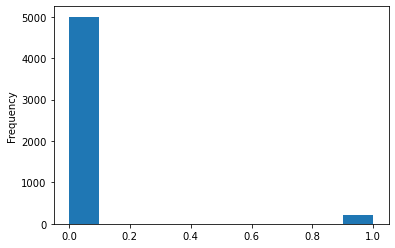

In [11]:
raw_data['default'].plot.hist()

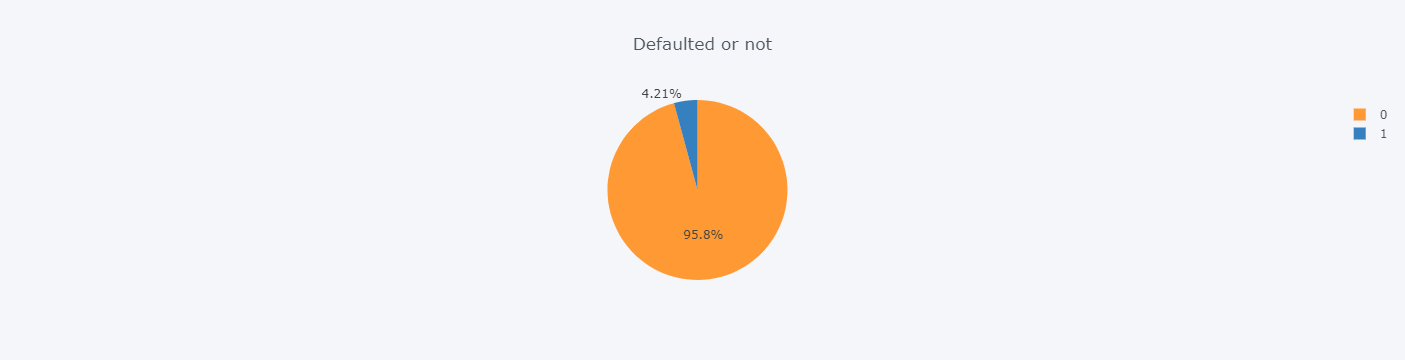

In [12]:
temp = raw_data["default"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Defaulted or not')

In Train data

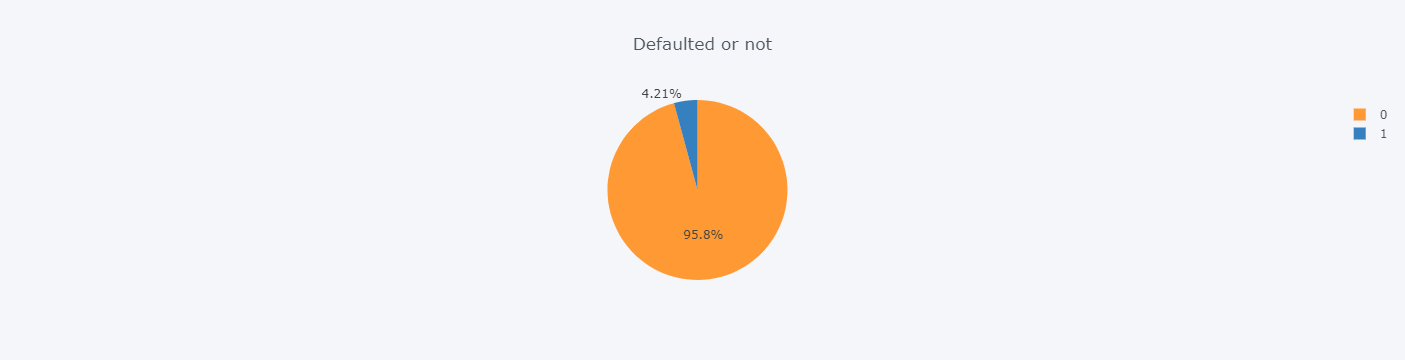

In [13]:
temp = ytrain.default.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Defaulted or not')

In Test data

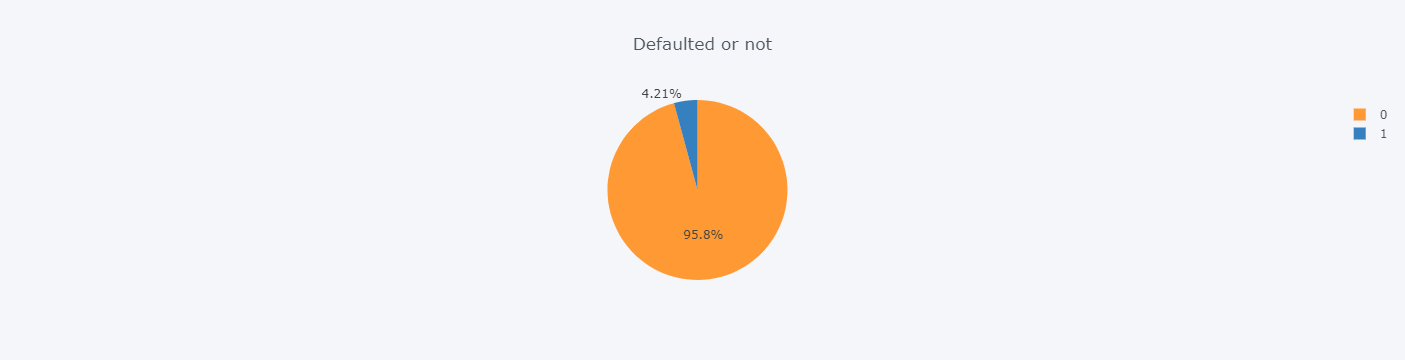

In [14]:
temp = yvalid.default.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Defaulted or not')

Observation 1.1: event (or default) rate is 4.21%

Observation 1.2: Kept the same event rate in test and train dataset

# Step 2: Examine Missing Values

In [15]:
raw_data.isnull().sum()

afterTaxInterestRate           0
taxRate                        0
netValuePerShare               0
revenuePerShare                0
currentRatio                   0
quickRatio                     0
totalDebtToNetWorth            0
accountsReceivablesTurnover    0
averageCollectionDays          0
inventoryTurnover              0
fixedAssetsTurnover            0
netWorthTurnover               0
revenuePerPerson               0
operatingProfitPerPerson       0
allocationRatePerPerson        0
cashToTotalAssets              0
quickAssetsToCurrentLiab       0
cashToCurrentLiab              0
operatingFundsToLiab           0
inventoryToWorkingCap          0
inventoryToCurrentLiab         0
workingCapitalToEquity         0
longTermLiabToCurrentAssets    0
totalIncomeToTotalExpense      0
totalExpenseToAssets           0
currentAssetsTurnover          0
quickAssetTurnover             0
cashTurnover                   0
cashFlowToSales                0
fixedAssetsToTotalAssets       0
currentLia

Observation 2: No column has missing values

# Step 3: Assessing numercial values 

( all of them since we don't have any ID or object kind of variable[except flag variable] )

In [16]:
assess_num=raw_data.describe()

In [17]:
assess_num

afterTaxInterestRate      taxRate  netValuePerShare  revenuePerShare  \
count           5220.000000  5220.000000       5220.000000     5.220000e+03   
mean               0.781439     0.114008          0.190246     1.446360e+06   
std                0.009041     0.139293          0.030594     6.268866e+07   
min                0.133479     0.000000          0.000000     0.000000e+00   
25%                0.781566     0.000000          0.173908     1.549904e-02   
50%                0.781633     0.070048          0.184463     2.742865e-02   
75%                0.781723     0.205993          0.200034     4.636100e-02   
max                0.795912     1.000000          0.475833     3.020000e+09   

       currentRatio    quickRatio  totalDebtToNetWorth  \
count  5.220000e+03  5.220000e+03         5.220000e+03   
mean   5.268199e+05  1.299808e+07         2.638123e+06   
std    3.806251e+07  3.008219e+08         1.065655e+08   
min    0.000000e+00  0.000000e+00         0.000000e+00   
25%    7.446311e-03  4.590685e-03         3.148852e-03   
50%    1.042493e-02  7.171670e-03         5.711341e-03   
75%    1.616922e-02  1.204386e-02         9.566018e-03   
max    2.750000e+09  9.230000e+09         6.470000e+09   

       accountsReceivablesTurnover  averageCollectionDays  inventoryTurnover  \
count                 5.220000e+03           5.220000e+03       5.220000e+03   
mean                  7.266284e+06           7.222605e+06       2.177430e+09   
std                   2.077922e+08           1.963771e+08       3.249958e+09   
min                   0.000000e+00           0.000000e+00       1.001220e-04   
25%                   7.121630e-04           4.232613e-03       1.782710e-04   
50%                   9.738980e-04           6.526426e-03       8.275375e-04   
75%                   1.507512e-03           8.914810e-03       4.660000e+09   
max                   9.330000e+09           7.940000e+09       9.990000e+09   

       ...  currentLiabToCurrentAssets  liabAssetFlag  netIncomeToTotalAssets  \
count  ...                 5220.000000    5220.000000             5220.000000   
mean   ...                    0.032245       0.001533                0.807397   
std    ...                    0.032576       0.039122                0.039091   
min    ...                    0.000122       0.000000                0.224792   
25%    ...                    0.018154       0.000000                0.796865   
50%    ...                    0.028038       0.000000                0.810535   
75%    ...                    0.038915       0.000000                0.825118   
max    ...                    1.000000       1.000000                0.982879   

       noCreditInterval  grossProfitToSales  liabToEquity  degreeFinLeverage  \
count       5220.000000         5220.000000   5220.000000        5220.000000   
mean           0.623827            0.607616      0.280563           0.027889   
std            0.007597            0.013749      0.016124           0.022313   
min            0.419045            0.432654      0.000000           0.000000   
25%            0.623610            0.600371      0.277051           0.026791   
50%            0.623866            0.605700      0.278906           0.026811   
75%            0.624155            0.613265      0.281680           0.026923   
max            0.792048            0.665149      1.000000           1.000000   

       interestCoverageRatio  equityToLiab      default  
count            5220.000000   5220.000000  5220.000000  
mean                0.565645      0.046532     0.042146  
std                 0.010301      0.050312     0.200940  
min                 0.172065      0.000000     0.000000  
25%                 0.565158      0.024020     0.000000  
50%                 0.565271      0.033096     0.000000  
75%                 0.565769      0.050936     0.000000  
max                 1.000000      1.000000     1.000000  

[8 rows x 44 columns]

Checking if value for any column is negative or not. Since the type of variables we have, any value shouldn't be negative

In [18]:
assess_num.loc['min']

afterTaxInterestRate           0.133479
taxRate                        0.000000
netValuePerShare               0.000000
revenuePerShare                0.000000
currentRatio                   0.000000
quickRatio                     0.000000
totalDebtToNetWorth            0.000000
accountsReceivablesTurnover    0.000000
averageCollectionDays          0.000000
inventoryTurnover              0.000100
fixedAssetsTurnover            0.000000
netWorthTurnover               0.000000
revenuePerPerson               0.000000
operatingProfitPerPerson       0.000000
allocationRatePerPerson        0.000000
cashToTotalAssets              0.000184
quickAssetsToCurrentLiab       0.000120
cashToCurrentLiab              0.000101
operatingFundsToLiab           0.026274
inventoryToWorkingCap          0.176457
inventoryToCurrentLiab         0.000000
workingCapitalToEquity         0.000000
longTermLiabToCurrentAssets    0.000000
totalIncomeToTotalExpense      0.000971
totalExpenseToAssets           0.000853


array([[<AxesSubplot:title={'center':'afterTaxInterestRate'}>,
        <AxesSubplot:title={'center':'taxRate'}>,
        <AxesSubplot:title={'center':'netValuePerShare'}>,
        <AxesSubplot:title={'center':'revenuePerShare'}>,
        <AxesSubplot:title={'center':'currentRatio'}>,
        <AxesSubplot:title={'center':'quickRatio'}>,
        <AxesSubplot:title={'center':'totalDebtToNetWorth'}>],
       [<AxesSubplot:title={'center':'accountsReceivablesTurnover'}>,
        <AxesSubplot:title={'center':'averageCollectionDays'}>,
        <AxesSubplot:title={'center':'inventoryTurnover'}>,
        <AxesSubplot:title={'center':'fixedAssetsTurnover'}>,
        <AxesSubplot:title={'center':'netWorthTurnover'}>,
        <AxesSubplot:title={'center':'revenuePerPerson'}>,
        <AxesSubplot:title={'center':'operatingProfitPerPerson'}>],
       [<AxesSubplot:title={'center':'allocationRatePerPerson'}>,
        <AxesSubplot:title={'center':'cashToTotalAssets'}>,
        <AxesSubplot:title={'ce

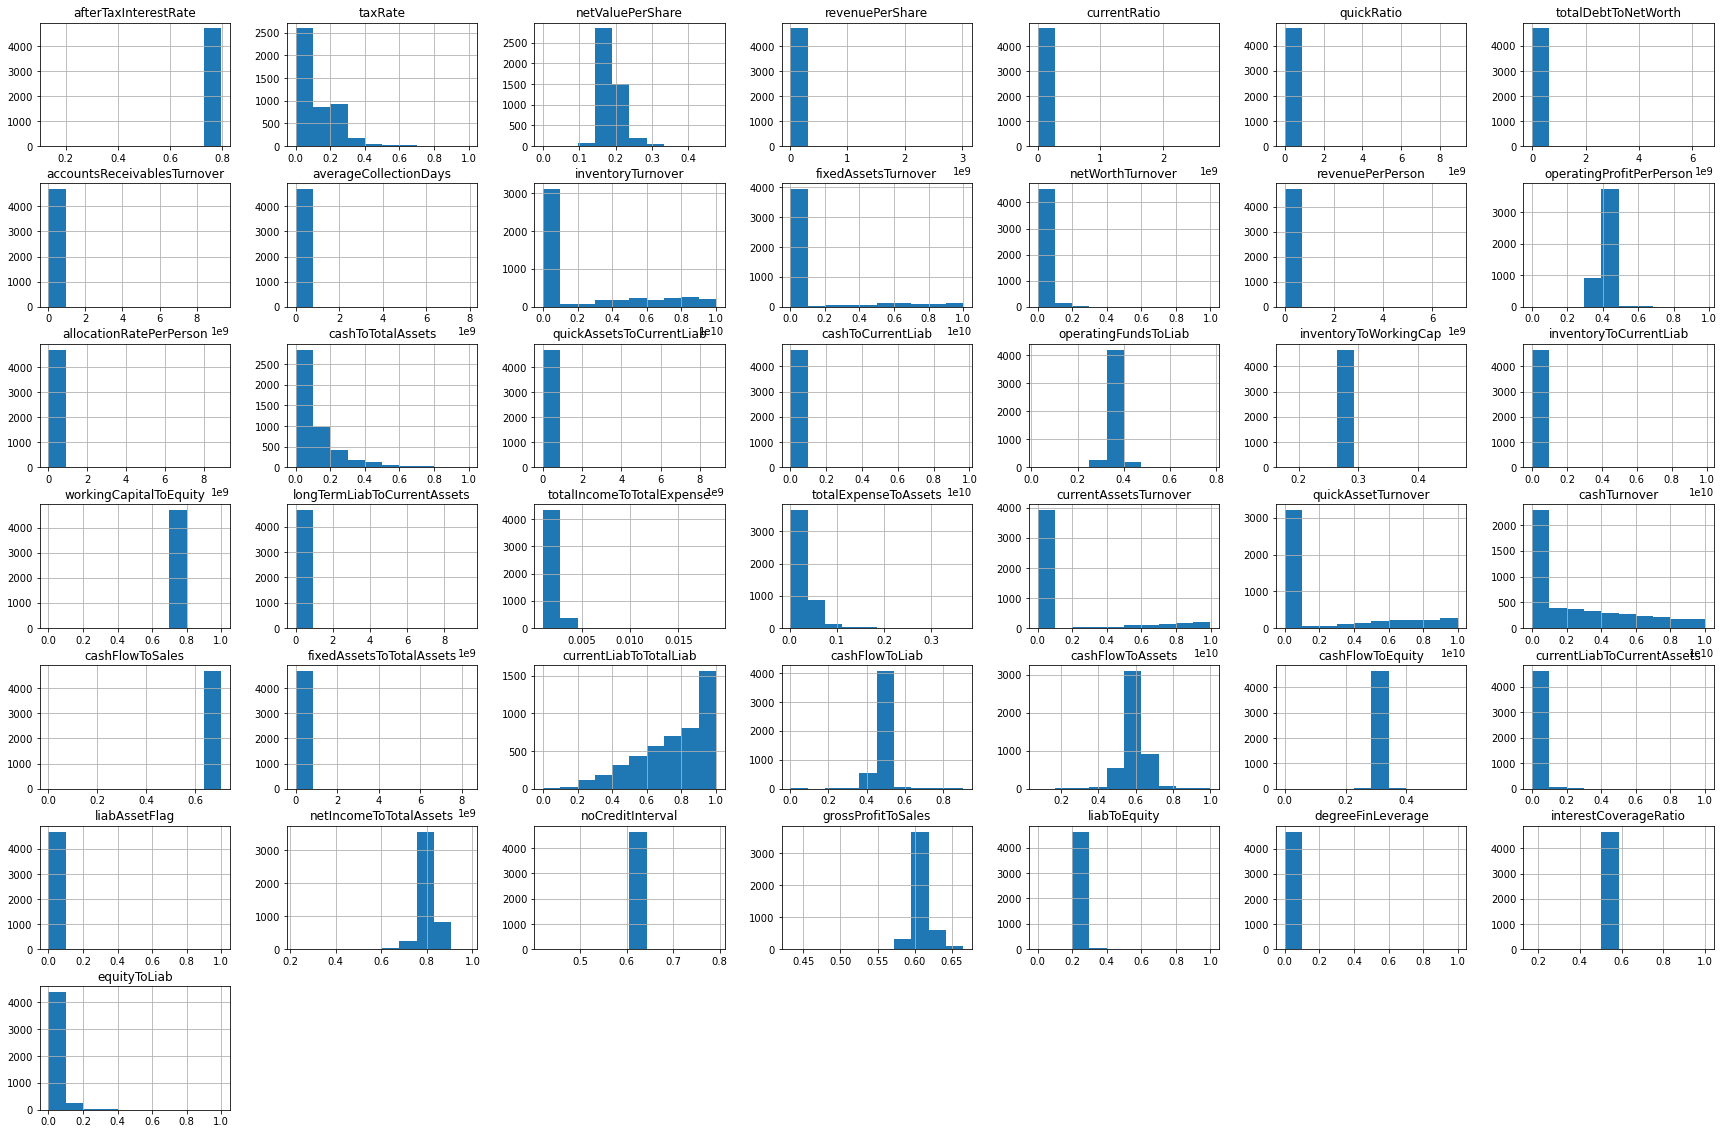

In [19]:
xtrain.hist(figsize=(30,20))

<AxesSubplot:xlabel='afterTaxInterestRate', ylabel='Density'>

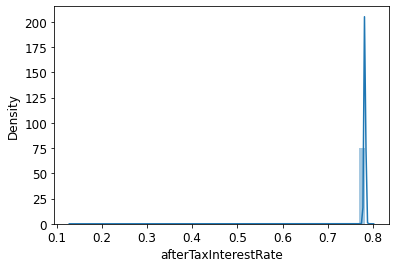

In [173]:
sns.distplot((xtrain['afterTaxInterestRate']))

<AxesSubplot:xlabel='taxRate', ylabel='Density'>

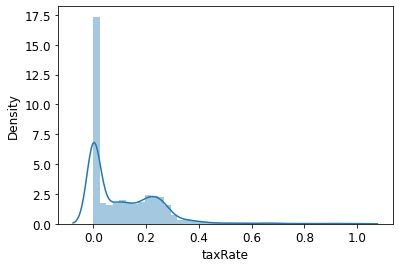

In [174]:
sns.distplot((xtrain['taxRate']))

<AxesSubplot:xlabel='operatingProfitPerPerson', ylabel='Density'>

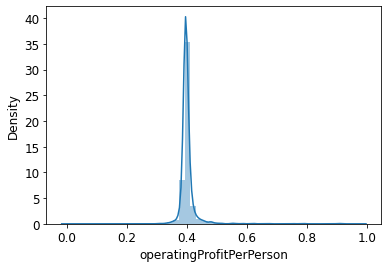

In [175]:
sns.distplot((xtrain['operatingProfitPerPerson']))

<AxesSubplot:xlabel='revenuePerShare', ylabel='Density'>

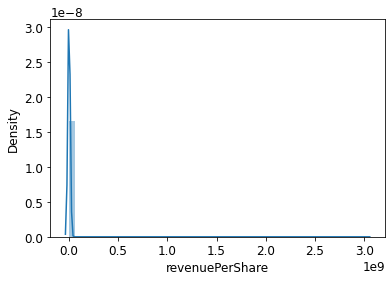

In [176]:
sns.distplot((xtrain['revenuePerShare']))

In [24]:
xtrain['longTermLiabToCurrentAssets'].value_counts()

0.000000    1802
0.006159       6
0.009159       5
0.027030       4
0.014164       4
            ... 
0.024571       1
0.004778       1
0.004558       1
0.005012       1
0.002386       1
Name: longTermLiabToCurrentAssets, Length: 2184, dtype: int64

# Step 3 

# Step 3.1 Outlier Detection

In [25]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   



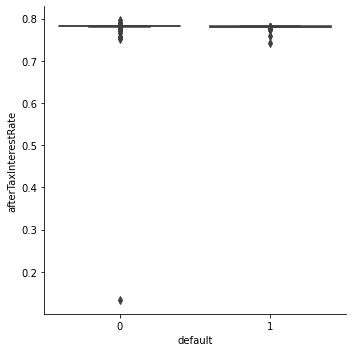

In [27]:
g = sns.catplot(y="afterTaxInterestRate", x = "default",data = raw_data, kind="box")

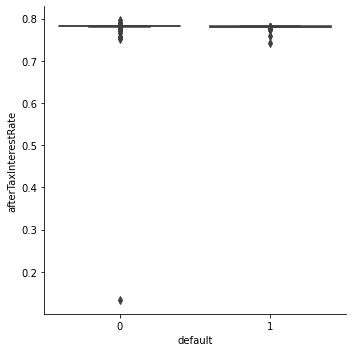

In [28]:
g = sns.catplot(y="afterTaxInterestRate", x = "default",data = raw_data, kind="box")

In [29]:
include_outliers = True
symbol = 'X' if include_outliers else ''
bounds = (5, 95) if include_outliers else (0,100)

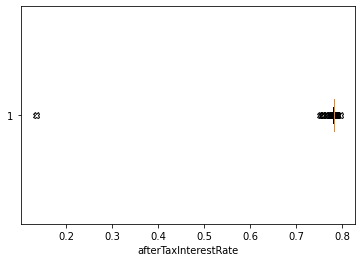

In [30]:
plt.boxplot(xtrain[xtrain.columns[0]], vert=False, sym=symbol, whis=bounds)
plt.xlabel(xtrain.columns[0])
plt.show()

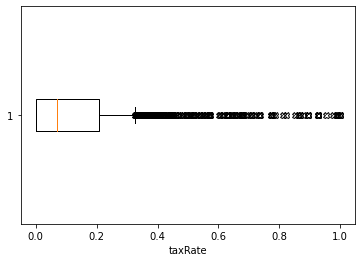

In [31]:
plt.boxplot(xtrain[xtrain.columns[1]], vert=False, sym=symbol, whis=bounds)
plt.xlabel(xtrain.columns[1])
plt.show()

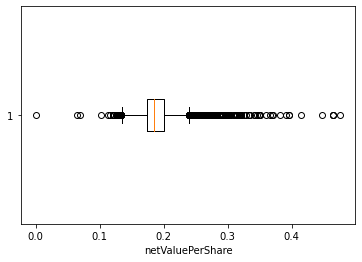

In [32]:
plt.boxplot(xtrain[xtrain.columns[2]], vert=False)
plt.xlabel(xtrain.columns[2])
plt.show()

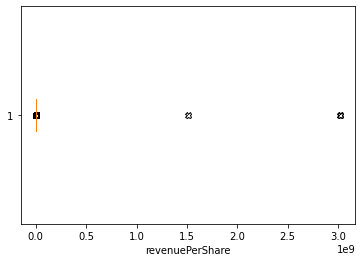

In [33]:
plt.boxplot(xtrain[xtrain.columns[3]], vert=False, sym=symbol)
plt.xlabel(xtrain.columns[3])
plt.show()

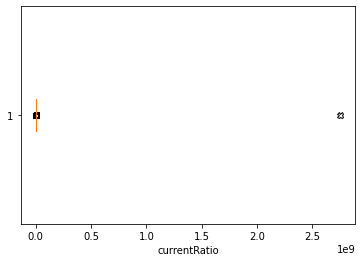

In [34]:
plt.boxplot(xtrain[xtrain.columns[4]], vert=False, sym=symbol)
plt.xlabel(xtrain.columns[4])
plt.show()

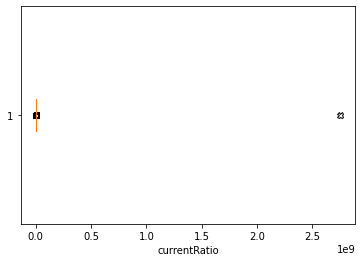

In [35]:
plt.boxplot(xtrain[xtrain.columns[4]], vert=False, sym=symbol)
plt.xlabel(xtrain.columns[4])
plt.show()

In [36]:
# Check for any variable with number of outliers more than 1
for i in xtrain.columns:
    print(i, len(detect_outliers(xtrain,1,[i])))

afterTaxInterestRate 0
taxRate 0
netValuePerShare 0
revenuePerShare 0
currentRatio 0
quickRatio 0
totalDebtToNetWorth 0
accountsReceivablesTurnover 0
averageCollectionDays 0
inventoryTurnover 0
fixedAssetsTurnover 0
netWorthTurnover 0
revenuePerPerson 0
operatingProfitPerPerson 0
allocationRatePerPerson 0
cashToTotalAssets 0
quickAssetsToCurrentLiab 0
cashToCurrentLiab 0
operatingFundsToLiab 0
inventoryToWorkingCap 0
inventoryToCurrentLiab 0
workingCapitalToEquity 0
longTermLiabToCurrentAssets 0
totalIncomeToTotalExpense 0
totalExpenseToAssets 0
currentAssetsTurnover 0
quickAssetTurnover 0
cashTurnover 0
cashFlowToSales 0
fixedAssetsToTotalAssets 0
currentLiabToTotalLiab 0
cashFlowToLiab 0
cashFlowToAssets 0
cashFlowToEquity 0
currentLiabToCurrentAssets 0
liabAssetFlag 0
netIncomeToTotalAssets 0
noCreditInterval 0
grossProfitToSales 0
liabToEquity 0
degreeFinLeverage 0
interestCoverageRatio 0
equityToLiab 0


In [37]:
# Check for any variable with number of outliers more than 0
for i in xtrain.columns:
    print(i, len(detect_outliers(xtrain,0,[i])))

afterTaxInterestRate 628
taxRate 79
netValuePerShare 294
revenuePerShare 331
currentRatio 401
quickRatio 410
totalDebtToNetWorth 282
accountsReceivablesTurnover 449
averageCollectionDays 107
inventoryTurnover 0
fixedAssetsTurnover 975
netWorthTurnover 351
revenuePerPerson 515
operatingProfitPerPerson 605
allocationRatePerPerson 488
cashToTotalAssets 370
quickAssetsToCurrentLiab 411
cashToCurrentLiab 525
operatingFundsToLiab 464
inventoryToWorkingCap 665
inventoryToCurrentLiab 282
workingCapitalToEquity 106
longTermLiabToCurrentAssets 417
totalIncomeToTotalExpense 296
totalExpenseToAssets 249
currentAssetsTurnover 965
quickAssetTurnover 0
cashTurnover 0
cashFlowToSales 753
fixedAssetsToTotalAssets 45
currentLiabToTotalLiab 12
cashFlowToLiab 845
cashFlowToAssets 252
cashFlowToEquity 602
currentLiabToCurrentAssets 205
liabAssetFlag 8
netIncomeToTotalAssets 437
noCreditInterval 771
grossProfitToSales 217
liabToEquity 281
degreeFinLeverage 1045
interestCoverageRatio 960
equityToLiab 398


In [38]:
#detect_outliers(xtrain,0,['netValuePerShare'])

[1332,
 1838,
 3548,
 1786,
 4350,
 564,
 172,
 1252,
 575,
 1584,
 1935,
 1475,
 4524,
 1530,
 5109,
 2306,
 2380,
 1778,
 1471,
 4151,
 1661,
 4080,
 60,
 1970,
 3377,
 4698,
 4043,
 2844,
 2239,
 919,
 4915,
 3560,
 484,
 3872,
 845,
 947,
 5089,
 1501,
 178,
 2841,
 5195,
 2176,
 2159,
 2492,
 4288,
 1149,
 4635,
 4650,
 3168,
 5217,
 2396,
 2304,
 1259,
 3509,
 2743,
 324,
 4844,
 1106,
 1375,
 238,
 1274,
 4428,
 3166,
 1510,
 280,
 1637,
 4822,
 4713,
 1940,
 3925,
 2644,
 3117,
 2329,
 2514,
 5097,
 3562,
 2624,
 4248,
 2772,
 4914,
 1859,
 2943,
 4286,
 2960,
 697,
 1058,
 2387,
 4016,
 5156,
 4179,
 2004,
 50,
 3653,
 5146,
 2522,
 2421,
 2411,
 1161,
 2343,
 701,
 4956,
 4230,
 1901,
 926,
 4600,
 3992,
 1195,
 1801,
 1659,
 2889,
 592,
 2289,
 142,
 744,
 5140,
 1683,
 469,
 2198,
 549,
 2760,
 4182,
 3805,
 3469,
 78,
 3277,
 5093,
 419,
 5149,
 2086,
 1865,
 4665,
 41,
 598,
 3922,
 4501,
 826,
 3248,
 1995,
 5029,
 776,
 951,
 4381,
 4537,
 4268,
 2585,
 192,
 4113,
 153

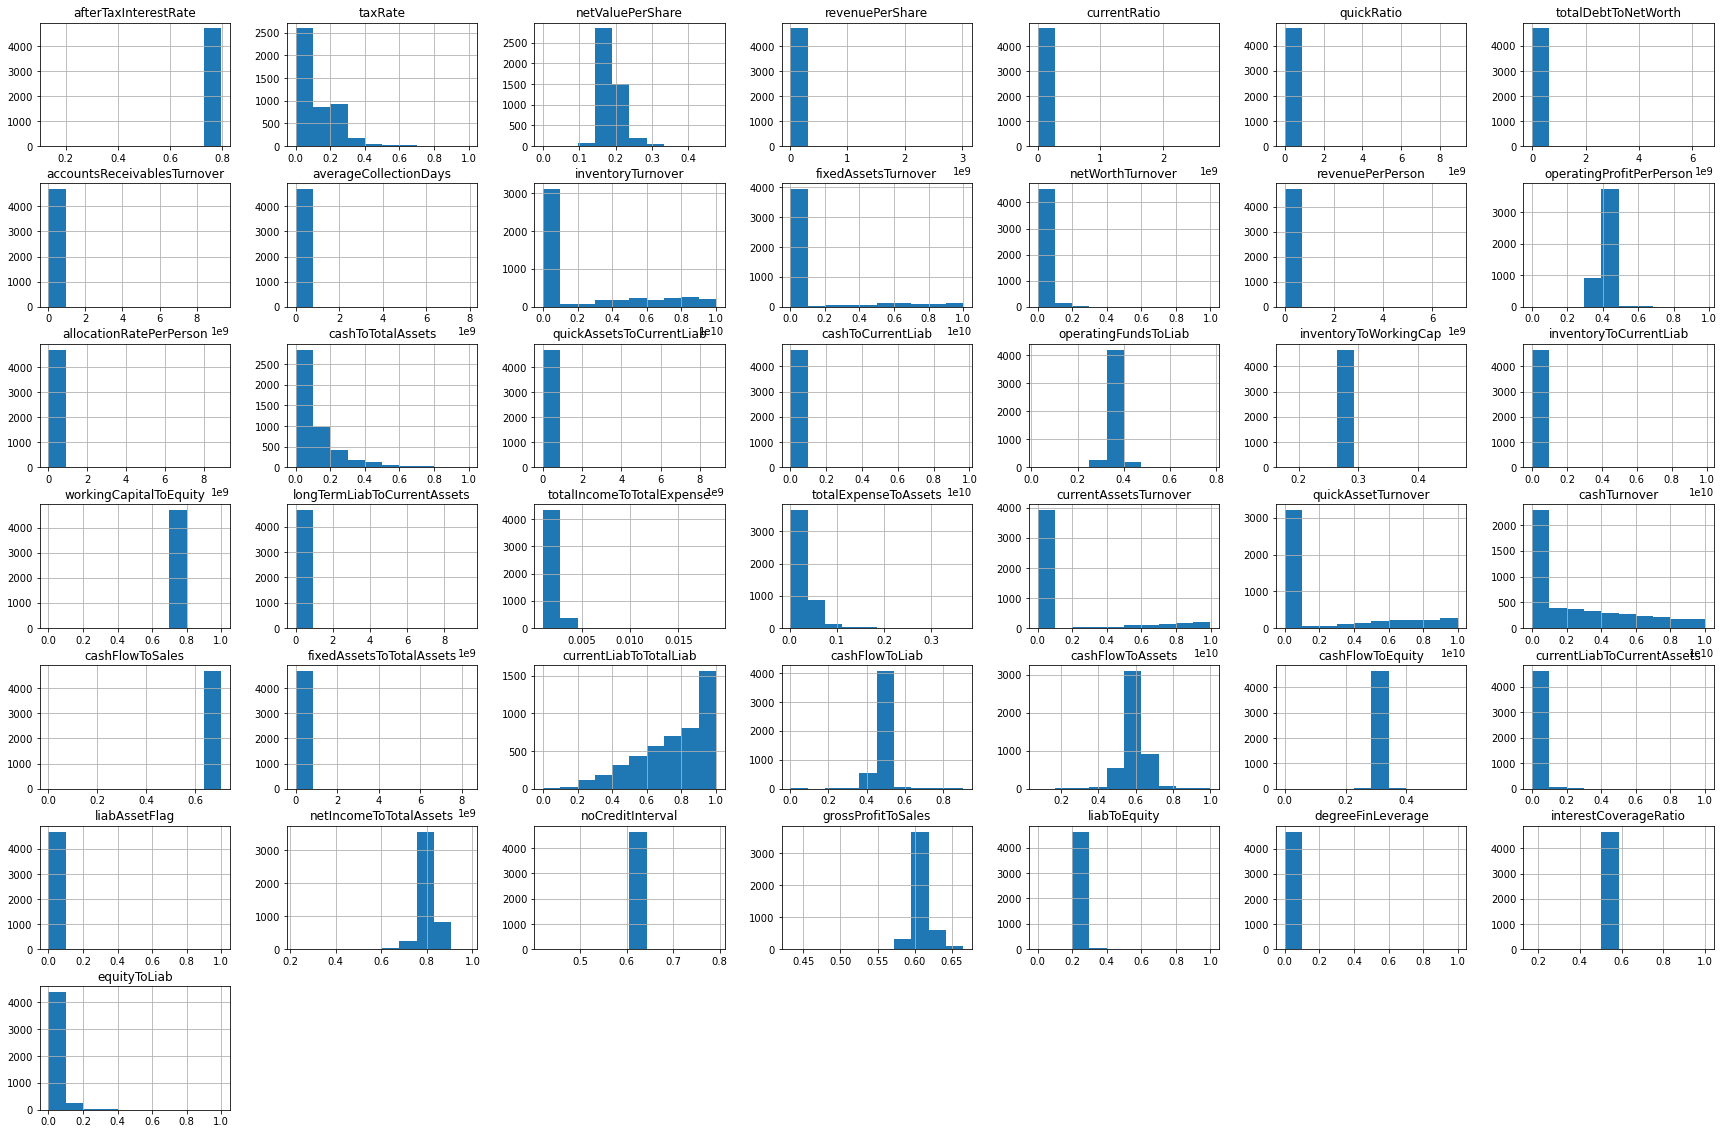

In [40]:
xtrain[xtrain.columns].hist(figsize=(30,20));

In [178]:
# Did not end up dropping any outlier
Outliers_to_drop = detect_outliers(xtrain,0,['netValuePerShare'])

In [42]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(xtrain,2,['afterTaxInterestRate', 'taxRate', 'netValuePerShare',
       'revenuePerShare', 'currentRatio', 'quickRatio', 'totalDebtToNetWorth',
       'accountsReceivablesTurnover', 'averageCollectionDays',
       'inventoryTurnover', 'fixedAssetsTurnover', 'netWorthTurnover',
       'revenuePerPerson', 'operatingProfitPerPerson',
       'allocationRatePerPerson', 'cashToTotalAssets',
       'quickAssetsToCurrentLiab', 'cashToCurrentLiab', 'operatingFundsToLiab',
       'inventoryToWorkingCap', 'inventoryToCurrentLiab',
       'workingCapitalToEquity', 'longTermLiabToCurrentAssets',
       'totalIncomeToTotalExpense', 'totalExpenseToAssets',
       'currentAssetsTurnover', 'quickAssetTurnover', 'cashTurnover',
       'cashFlowToSales', 'fixedAssetsToTotalAssets', 'currentLiabToTotalLiab',
       'cashFlowToLiab', 'cashFlowToAssets', 'cashFlowToEquity',
       'currentLiabToCurrentAssets', 'liabAssetFlag', 'netIncomeToTotalAssets',
       'noCreditInterval', 'grossProfitToSales', 'liabToEquity',
       'degreeFinLeverage', 'interestCoverageRatio', 'equityToLiab'])

In [43]:
Outliers_to_drop

[1332,
 2351,
 4377,
 1854,
 1838,
 2834,
 3860,
 4788,
 5151,
 4350,
 4290,
 5186,
 4866,
 393,
 931,
 765,
 4675,
 1252,
 4970,
 575,
 355,
 1487,
 835,
 2995,
 2862,
 4295,
 4458,
 3654,
 2857,
 264,
 5082,
 4599,
 4285,
 5109,
 5033,
 2306,
 1183,
 2291,
 4752,
 4919,
 3641,
 1980,
 220,
 3782,
 133,
 2587,
 4062,
 3112,
 594,
 440,
 5142,
 3704,
 3941,
 3588,
 919,
 4915,
 463,
 2088,
 3872,
 462,
 5089,
 1501,
 3895,
 2846,
 4354,
 5195,
 1260,
 2176,
 585,
 2159,
 2492,
 2821,
 3988,
 5073,
 5005,
 3812,
 5034,
 4796,
 2951,
 3689,
 4324,
 82,
 4507,
 3025,
 3815,
 5211,
 1951,
 883,
 2610,
 1114,
 2399,
 3430,
 2304,
 2680,
 2358,
 4236,
 5080,
 4840,
 2032,
 4277,
 238,
 4613,
 4428,
 1175,
 622,
 2353,
 785,
 5064,
 368,
 3970,
 759,
 2788,
 4713,
 1514,
 2349,
 4405,
 3925,
 5134,
 3117,
 3259,
 5097,
 1428,
 4785,
 3691,
 2624,
 3919,
 547,
 3198,
 4740,
 5046,
 372,
 5160,
 49,
 3477,
 118,
 1859,
 2336,
 1162,
 2943,
 3553,
 413,
 4438,
 597,
 5024,
 5115,
 3082,
 1058,
 

In [44]:
xtrain.loc[Outliers_to_drop]

afterTaxInterestRate   taxRate  netValuePerShare  revenuePerShare  \
1332              0.782586  0.079360          0.395348         0.015654   
2351              0.779429  0.000000          0.140449         0.004008   
4377              0.776069  0.000000          0.165311         0.000469   
1854              0.781314  0.000000          0.159538         0.011268   
1838              0.781968  0.026015          0.247524         0.042863   
...                    ...       ...               ...              ...   
288               0.781610  0.000000          0.174160         0.014368   
2312              0.781603  0.318656          0.175214         0.038976   
3315              0.781611  0.000000          0.174497         0.009271   
1390              0.781611  0.000000          0.174497         0.009271   
5143              0.781531  0.000000          0.186676         0.067955   

      currentRatio  quickRatio  totalDebtToNetWorth  \
1332      0.040956    0.038557             0.000866   
2351      0.004994    0.002773             0.011020   
4377      0.147532    0.139169             0.000196   
1854      0.002776    0.001629             0.006354   
1838      0.023143    0.017370             0.002721   
...            ...         ...                  ...   
288       0.010781    0.006689             0.003144   
2312      0.009704    0.002505             0.018480   
3315      0.015551    0.014082             0.002896   
1390      0.015551    0.014082             0.002896   
5143      0.009441    0.003180             0.017315   

      accountsReceivablesTurnover  averageCollectionDays  inventoryTurnover  \
1332                     0.000925               0.006830       7.260000e+09   
2351                     0.000860               0.007356       1.213310e-04   
4377                     0.000000               0.000000       1.910000e+07   
1854                     0.001154               0.005474       8.690000e+09   
1838                     0.001826               0.003465       1.056630e-04   
...                           ...                    ...                ...   
288                      0.000584               0.010812       5.730000e+09   
2312                     0.000950               0.006666       3.250000e+08   
3315                     0.000741               0.008543       3.531030e-04   
1390                     0.000741               0.008543       3.531030e-04   
5143                     0.001656               0.003818       5.640000e+09   

      ...  cashFlowToEquity  currentLiabToCurrentAssets  liabAssetFlag  \
1332  ...          0.334746                    0.007061              0   
2351  ...          0.302522                    0.057049              0   
4377  ...          0.309387                    0.001752              0   
1854  ...          0.315443                    0.098373              0   
1838  ...          0.315940                    0.012656              0   
...   ...               ...                         ...            ...   
288   ...          0.312202                    0.027109              0   
2312  ...          0.314109                    0.030060              0   
3315  ...          0.312365                    0.018861              0   
1390  ...          0.312365                    0.018861              0   
5143  ...          0.317470                    0.030879              0   

      netIncomeToTotalAssets  noCreditInterval  grossProfitToSales  \
1332                0.982879          0.652050            0.628431   
2351                0.631838          0.623315            0.543178   
4377                0.759839          0.624375            0.665149   
1854                0.774682          0.623346            0.598898   
1838                0.865781          0.624669            0.614653   
...                      ...               ...                 ...   
288                 0.794836          0.625148            0.604155   
2312                0.802308          0.620893

In [45]:
def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [46]:
# For comparison, make one array each using standard deviations of 2.0, 3.0 and 4.0.
std2 = xtrain.apply(out_std, nstd=2.0)
std3 = xtrain.apply(out_std, nstd=3.0)
std4 = xtrain.apply(out_std, nstd=4.0)

# For comparison, make one array each at varying values of k.
iqr1 = xtrain.apply(out_iqr, k=1.5)
iqr2 = xtrain.apply(out_iqr, k=2.0)
iqr3 = xtrain.apply(out_iqr, k=3.0)

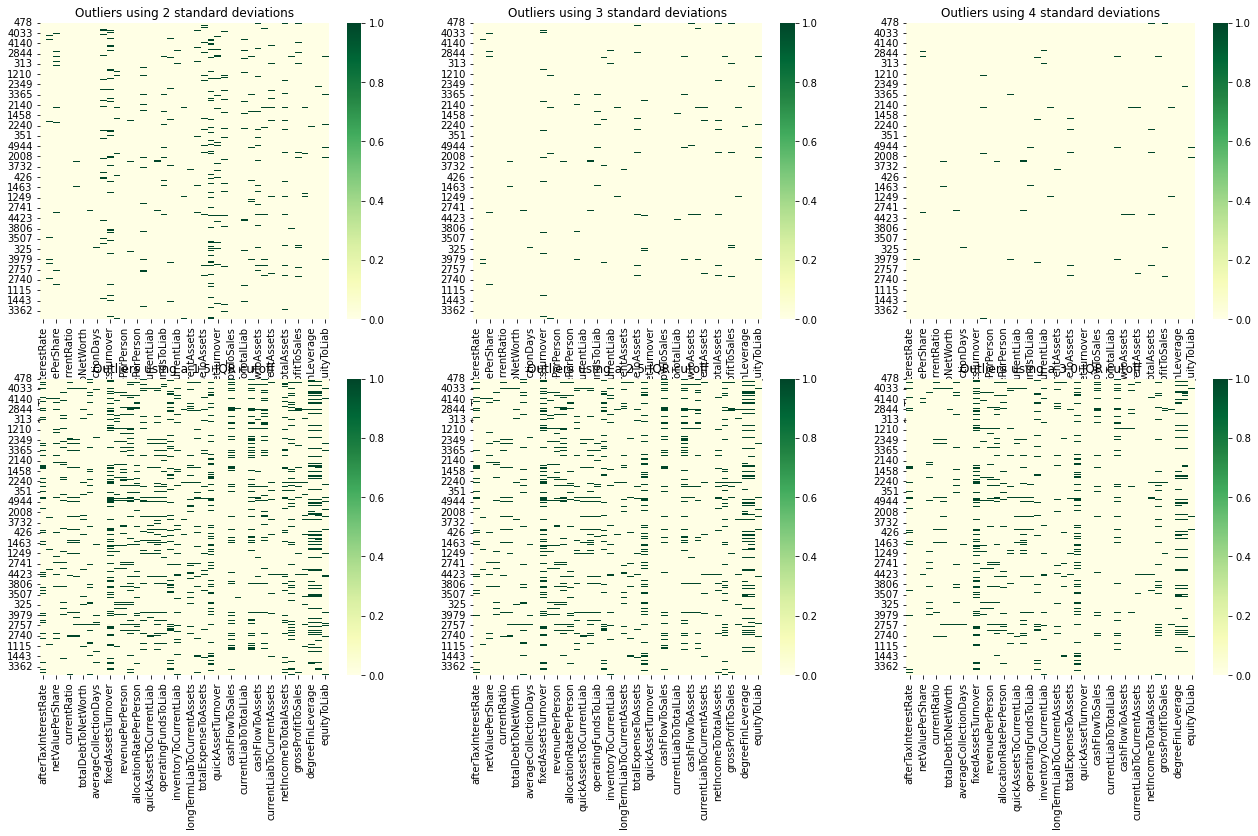

In [47]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(22, 12));
ax1.set_title('Outliers using 2 standard deviations');
ax2.set_title('Outliers using 3 standard deviations');
ax3.set_title('Outliers using 4 standard deviations');
ax4.set_title('Outliers using a 1.5 IQR cutoff');
ax5.set_title('Outliers using a 2.5 IQR cutoff');
ax6.set_title('Outliers using a 3.0 IQR cutoff');

sns.heatmap(std2, cmap='YlGn', ax=ax1);
sns.heatmap(std3, cmap='YlGn', ax=ax2);
sns.heatmap(std4, cmap='YlGn', ax=ax3);
sns.heatmap(iqr1, cmap='YlGn', ax=ax4);
sns.heatmap(iqr2, cmap='YlGn', ax=ax5);
sns.heatmap(iqr3, cmap='YlGn', ax=ax6);

plt.savefig('outliers.png') # testing control of newsfeed figure: https://www.kaggle.com/questions-and-answers/57099#post330539
plt.show()

# Weight of Evidence 

In [48]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [179]:
final_iv, IV = data_vars(raw_data,raw_data.default)

In [180]:
final_iv

VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  \
0             afterTaxInterestRate   0.133479   0.781403    580    130   
1             afterTaxInterestRate   0.781404   0.781547    580     50   
2             afterTaxInterestRate   0.781547   0.781588    582     16   
3             afterTaxInterestRate   0.781588   0.781618    578      9   
4             afterTaxInterestRate   0.781618   0.781647    586      9   
..                             ...        ...        ...    ...    ...   
200               equityToLiab_log  -2.737931   0.000000    870      2   
201  totalIncomeToTotalExpense_log  -6.936990  -6.102974   1307    183   
202  totalIncomeToTotalExpense_log  -6.102920  -6.060359   1303     26   
203  totalIncomeToTotalExpense_log  -6.060311  -5.995947   1305      6   
204  totalIncomeToTotalExpense_log  -5.995585  -3.970098   1305      5   

     EVENT_RATE  NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT  \
0      0.224138       450        0.775862    0.590909          0.0900   
1      0.086207       530        0.913793    0.227273          0.1060   
2      0.027491       566        0.972509    0.072727          0.1132   
3      0.015571       569        0.984429    0.040909          0.1138   
4      0.015358       577        0.984642    0.040909          0.1154   
..          ...       ...             ...         ...             ...   
200    0.002299       868        0.997701    0.009091          0.1736   
201    0.140015      1124        0.859985    0.831818          0.2248   
202    0.019954      1277        0.980046    0.118182          0.2554   
203    0.004598      1299        0.995402    0.027273          0.2598   
204    0.003831      1300        0.996169    0.022727          0.2600   

          WOE        IV  
0    1.881853  2.049013  
1    0.762712  2.049013  
2   -0.442440  2.049013  
3   -1.023090  2.049013  
4   -1.037052  2.049013  
..        ...       ...  
200 -2.949479  1.900666  
201  1.308403  2.002349  
202 -0.770607  2.002349  
203 -2.254025  2.002349  
204 -2.437116  2.002349  

[205 rows x 12 columns]

In [181]:
final_iv[final_iv.VAR_NAME=='afterTaxInterestRate']

VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0  afterTaxInterestRate   0.133479   0.781403    580    130    0.224138   
1  afterTaxInterestRate   0.781404   0.781547    580     50    0.086207   
2  afterTaxInterestRate   0.781547   0.781588    582     16    0.027491   
3  afterTaxInterestRate   0.781588   0.781618    578      9    0.015571   
4  afterTaxInterestRate   0.781618   0.781647    586      9    0.015358   
5  afterTaxInterestRate   0.781647   0.781683    576      3    0.005208   
6  afterTaxInterestRate   0.781683   0.781742    581      2    0.003442   
7  afterTaxInterestRate   0.781743   0.781839    577      1    0.001733   
8  afterTaxInterestRate   0.781840   0.795912    580      0    0.000000   

   NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0       450        0.775862    0.590909          0.0900  1.881853  2.049013  
1       530        0.913793    0.227273          0.1060  0.762712  2.049013  
2       566        0.972509    0.072727          0.1132 -0.442440  2.049013  
3       569        0.984429    0.040909          0.1138 -1.023090  2.049013  
4       577        0.984642    0.040909          0.1154 -1.037052  2.049013  
5       573        0.994792    0.013636          0.1146 -2.128708  2.049013  
6       579        0.996558    0.009091          0.1158 -2.544590  2.049013  
7       576        0.998267    0.004545          0.1152 -3.232542  2.049013  
8       580        1.000000    0.000000          0.1160  0.000000  2.049013

In [182]:
IV.sort_values('IV')

VAR_NAME        IV
0      accountsReceivablesTurnover  0.000062
3            averageCollectionDays  0.000834
16          currentLiabToTotalLiab  0.003200
12                    cashTurnover  0.003246
38                netWorthTurnover  0.004689
46                revenuePerPerson  0.005775
30           inventoryTurnover_log  0.029439
29            inventoryTurnover_bx  0.029439
28               inventoryTurnover  0.029439
26           inventoryToWorkingCap  0.029439
27       inventoryToWorkingCap_log  0.029439
22             fixedAssetsTurnover  0.040518
13           currentAssetsTurnover  0.062216
21        fixedAssetsToTotalAssets  0.066977
43              quickAssetTurnover  0.090394
31                 liabAssetFlag_0  0.114194
32                 liabAssetFlag_1  0.114194
25          inventoryToCurrentLiab  0.129053
47                 revenuePerShare  0.168723
52        totalExpenseToAssets_log  0.172854
51            totalExpenseToAssets  0.172854
34     longTermLiabToCurrentAssets  0.184266
2          allocationRatePerPerson  0.193268
55          workingCapitalToEquity  0.252830
5                 cashFlowToEquity  0.269160
24           interestCoverageRatio  0.298224
39                noCreditInterval  0.335549
8                  cashFlowToSales  0.347417
7               cashFlowToLiab_log  0.404664
6                   cashFlowToLiab  0.404664
18               degreeFinLeverage  0.419612
4                 cashFlowToAssets  0.523683
9                cashToCurrentLiab  0.644083
23              grossProfitToSales  0.711781
11           cashToTotalAssets_log  0.742010
10               cashToTotalAssets  0.742010
40            operatingFundsToLiab  0.875247
48                         taxRate  0.976640
41        operatingProfitPerPerson  1.011827
42    operatingProfitPerPerson_log  1.012819
33                    liabToEquity  1.241491
49                     taxRate_log  1.259933
44        quickAssetsToCurrentLiab  1.344484
14      currentLiabToCurrentAssets  1.346728
15  currentLiabToCurrentAssets_log  1.346728
17                    currentRatio  1.362764
35          netIncomeToTotalAssets  1.451308
36                netValuePerShare  1.646185
37            netValuePerShare_log  1.646327
45                      quickRatio  1.648565
20                equityToLiab_log  1.900666
19                    equityToLiab  1.939089
54   totalIncomeToTotalExpense_log  2.002349
53       totalIncomeToTotalExpense  2.002349
50             totalDebtToNetWorth  2.044488
1             afterTaxInterestRate  2.049013

In [183]:
var_name=list(IV[IV.IV > 0.01].sort_values('IV').VAR_NAME)

In [184]:
var_name

['inventoryTurnover',
 'inventoryToWorkingCap',
 'inventoryToWorkingCap_log',
 'inventoryTurnover_bx',
 'inventoryTurnover_log',
 'fixedAssetsTurnover',
 'currentAssetsTurnover',
 'fixedAssetsToTotalAssets',
 'quickAssetTurnover',
 'liabAssetFlag_1',
 'liabAssetFlag_0',
 'inventoryToCurrentLiab',
 'revenuePerShare',
 'totalExpenseToAssets',
 'totalExpenseToAssets_log',
 'longTermLiabToCurrentAssets',
 'allocationRatePerPerson',
 'workingCapitalToEquity',
 'cashFlowToEquity',
 'interestCoverageRatio',
 'noCreditInterval',
 'cashFlowToSales',
 'cashFlowToLiab',
 'cashFlowToLiab_log',
 'degreeFinLeverage',
 'cashFlowToAssets',
 'cashToCurrentLiab',
 'grossProfitToSales',
 'cashToTotalAssets',
 'cashToTotalAssets_log',
 'operatingFundsToLiab',
 'taxRate',
 'operatingProfitPerPerson',
 'operatingProfitPerPerson_log',
 'liabToEquity',
 'taxRate_log',
 'quickAssetsToCurrentLiab',
 'currentLiabToCurrentAssets',
 'currentLiabToCurrentAssets_log',
 'currentRatio',
 'netIncomeToTotalAssets',
 'ne

# Correlation analysis

<AxesSubplot:>

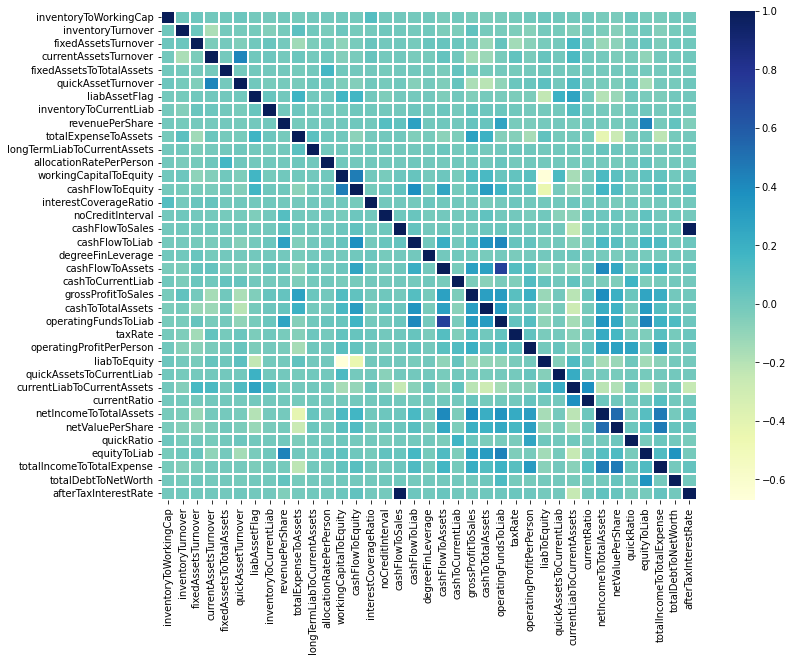

In [56]:
#correlation matrix
corrmat = raw_data[var_name].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [57]:
for i in corrmat.columns:
    xx=corrmat[(abs(corrmat[i]) > 0.5) & (corrmat[i] != 1)]
    if xx.empty:
        continue
    else:
        print(i,xx[i].apply(lambda x : x if ( abs(x) > 0.5) else None))

workingCapitalToEquity liabToEquity   -0.670294
Name: workingCapitalToEquity, dtype: float64
cashFlowToSales afterTaxInterestRate    0.988696
Name: cashFlowToSales, dtype: float64
cashFlowToAssets operatingFundsToLiab    0.730428
Name: cashFlowToAssets, dtype: float64
operatingFundsToLiab cashFlowToAssets    0.730428
Name: operatingFundsToLiab, dtype: float64
liabToEquity workingCapitalToEquity   -0.670294
Name: liabToEquity, dtype: float64
netIncomeToTotalAssets netValuePerShare    0.527805
Name: netIncomeToTotalAssets, dtype: float64
netValuePerShare netIncomeToTotalAssets    0.527805
Name: netValuePerShare, dtype: float64
afterTaxInterestRate cashFlowToSales    0.988696
Name: afterTaxInterestRate, dtype: float64


As we can see, there's high correlation among multiple variables

workingCapitalToEquity liabToEquity   -0.670294

cashFlowToSales afterTaxInterestRate    0.98869

cashFlowToAssets operatingFundsToLiab    0.730428

netIncomeToTotalAssets netValuePerShare    0.527805

<AxesSubplot:xlabel='workingCapitalToEquity', ylabel='Density'>

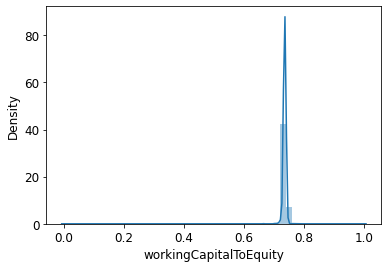

In [185]:
sns.distplot((raw_data['workingCapitalToEquity']))

<AxesSubplot:xlabel='liabToEquity', ylabel='Density'>

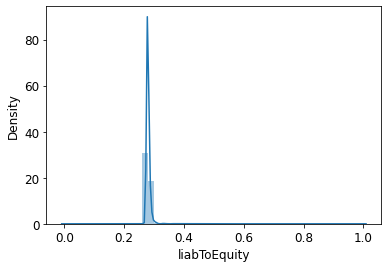

In [186]:
sns.distplot((raw_data['liabToEquity']))

<AxesSubplot:xlabel='afterTaxInterestRate', ylabel='Density'>

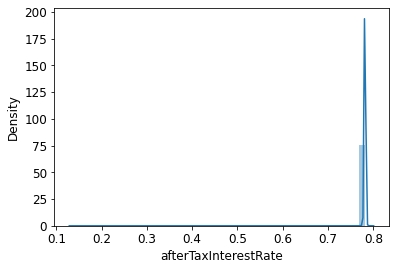

In [187]:
sns.distplot((raw_data['afterTaxInterestRate']))

<AxesSubplot:xlabel='cashFlowToSales', ylabel='Density'>

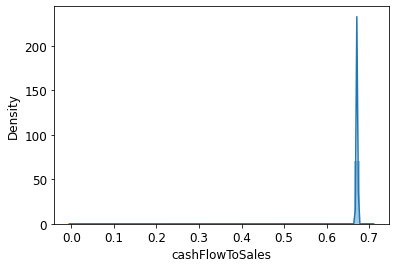

In [188]:
sns.distplot((raw_data['cashFlowToSales']))

<AxesSubplot:xlabel='cashFlowToAssets', ylabel='Density'>

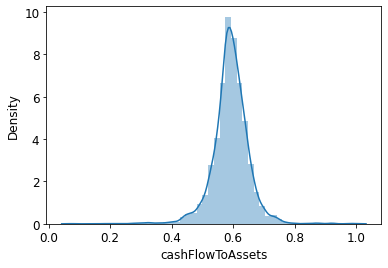

In [189]:
sns.distplot((raw_data['cashFlowToAssets']))

<AxesSubplot:xlabel='operatingFundsToLiab', ylabel='Density'>

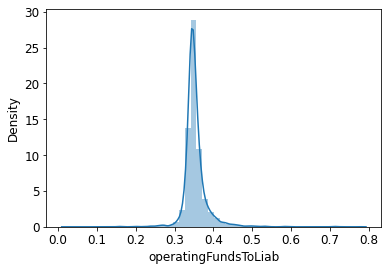

In [190]:
sns.distplot((raw_data['operatingFundsToLiab']))

<AxesSubplot:xlabel='netIncomeToTotalAssets', ylabel='Density'>

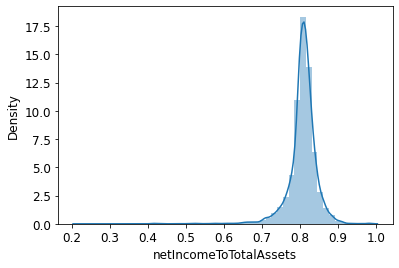

In [191]:

sns.distplot((raw_data['netIncomeToTotalAssets']))

<AxesSubplot:xlabel='netValuePerShare', ylabel='Density'>

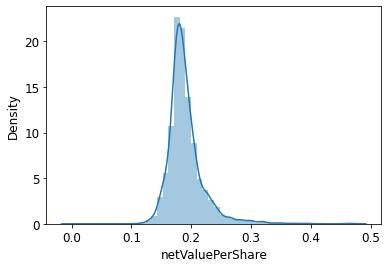

In [192]:
sns.distplot((raw_data['netValuePerShare']))

In [66]:
var_name1=['workingCapitalToEquity','afterTaxInterestRate','operatingFundsToLiab','netIncomeToTotalAssets' ]

In [67]:
new_var_name=[x for x in var_name if x not in var_name1]

#  Checking Logistic Regression Assumptions

# Multicollierity by VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = new_var_name
X=raw_data[new_var_name]
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [69]:
vif_data

feature          VIF
0         inventoryToWorkingCap     0.869662
1             inventoryTurnover     1.538652
2           fixedAssetsTurnover     1.314027
3         currentAssetsTurnover     1.554559
4      fixedAssetsToTotalAssets     1.030477
5            quickAssetTurnover     1.812915
6                 liabAssetFlag     1.304358
7        inventoryToCurrentLiab     1.025763
8               revenuePerShare     1.429919
9          totalExpenseToAssets     1.551519
10  longTermLiabToCurrentAssets     1.011855
11      allocationRatePerPerson     1.031532
12             cashFlowToEquity  1428.473552
13        interestCoverageRatio  2767.421634
14             noCreditInterval  4905.047257
15              cashFlowToSales  4398.768809
16               cashFlowToLiab     1.458927
17            degreeFinLeverage     1.003524
18             cashFlowToAssets     1.294832
19            cashToCurrentLiab     1.051886
20           grossProfitToSales  2745.820361
21            cashToTotalAssets     1.678308
22                      taxRate     1.071486
23     operatingProfitPerPerson     1.312452
24                 liabToEquity   424.797951
25     quickAssetsToCurrentLiab     1.109795
26   currentLiabToCurrentAssets     3.618321
27                 currentRatio     1.277612
28             netValuePerShare     1.513749
29                   quickRatio     1.102033
30                 equityToLiab     1.931336
31    totalIncomeToTotalExpense     1.413790
32          totalDebtToNetWorth     1.210770

Removing:
    
    workingCapitalToEquity
    
    afterTaxInterestRate
    
    operatingFundsToLiab
    
    netIncomeToTotalAssets
    
Because variable with high value of VIF

    workingCapitalToEquity: 0.252830 vs liabToEquity 1.24
    afterTaxInterestRate: 2.049013 vs cashFlowToSales 0.347417
    operatingFundsToLiab	0.875247 vs cashFlowToAssets	0.523683
    netIncomeToTotalAssets	1.451308 vs netValuePerShare	1.646185
    

In [70]:
modified_var_list= list(vif_data[vif_data.VIF < 4].feature)

In [71]:
modified_var_list

['inventoryToWorkingCap',
 'inventoryTurnover',
 'fixedAssetsTurnover',
 'currentAssetsTurnover',
 'fixedAssetsToTotalAssets',
 'quickAssetTurnover',
 'liabAssetFlag',
 'inventoryToCurrentLiab',
 'revenuePerShare',
 'totalExpenseToAssets',
 'longTermLiabToCurrentAssets',
 'allocationRatePerPerson',
 'cashFlowToLiab',
 'degreeFinLeverage',
 'cashFlowToAssets',
 'cashToCurrentLiab',
 'cashToTotalAssets',
 'taxRate',
 'operatingProfitPerPerson',
 'quickAssetsToCurrentLiab',
 'currentLiabToCurrentAssets',
 'currentRatio',
 'netValuePerShare',
 'quickRatio',
 'equityToLiab',
 'totalIncomeToTotalExpense',
 'totalDebtToNetWorth']

# Normality Assumption

In [72]:
from scipy.stats import norm
from scipy import stats
def normality_assumption(x):
    sns.distplot(raw_data[x], fit=norm)
    fig = plt.figure()
    res = stats.probplot(raw_data[x], plot=plt)

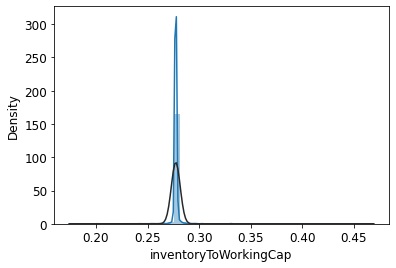

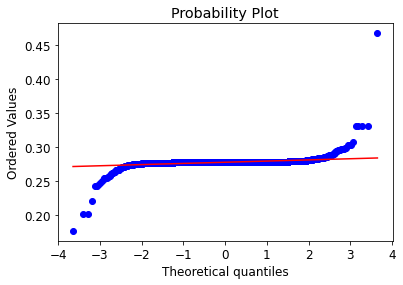

In [193]:
normality_assumption('inventoryToWorkingCap')


In [194]:
#applying log transformation
raw_data['inventoryToWorkingCap_log'] = np.log(raw_data['inventoryToWorkingCap'])

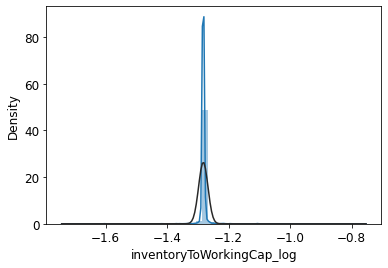

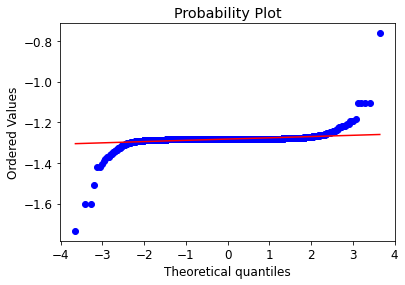

In [195]:
normality_assumption('inventoryToWorkingCap_log')

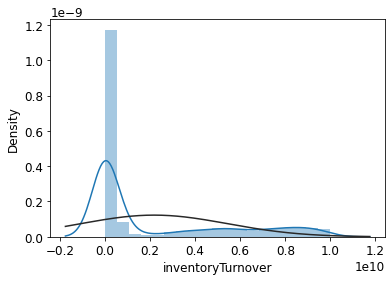

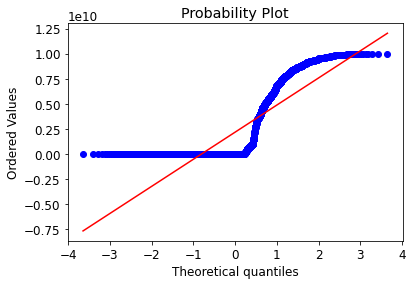

In [196]:

normality_assumption( 'inventoryTurnover')


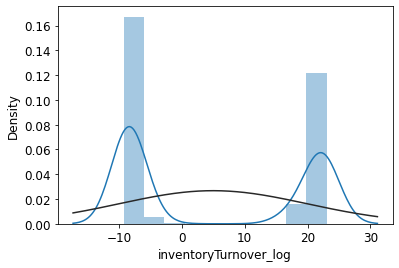

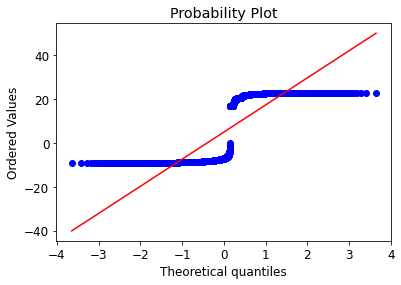

In [197]:
#applying log transformation
raw_data['inventoryTurnover_log'] = np.log(raw_data['inventoryTurnover'])
normality_assumption( 'inventoryTurnover_log')

In [198]:
fitted_data,x = stats.boxcox(raw_data['inventoryTurnover'])

raw_data['inventoryTurnover_bx'] = fitted_data

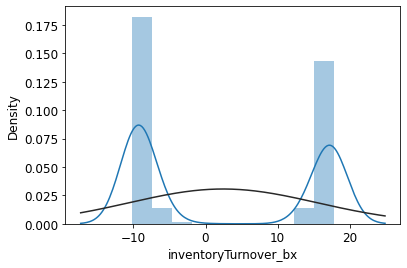

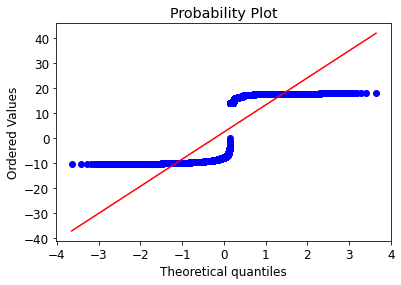

In [199]:
normality_assumption( 'inventoryTurnover_bx')

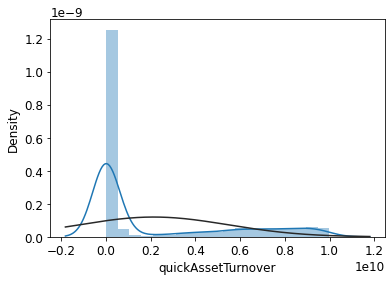

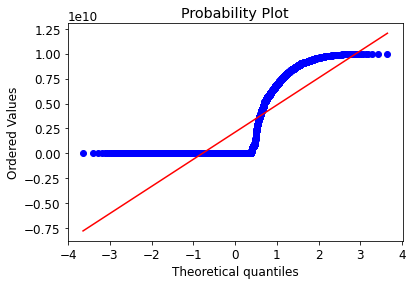

In [200]:
normality_assumption( 'quickAssetTurnover')


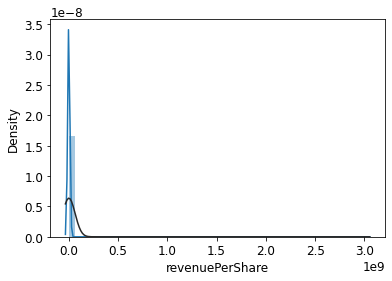

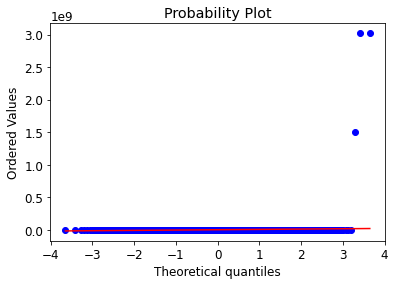

In [201]:
normality_assumption( 'revenuePerShare')


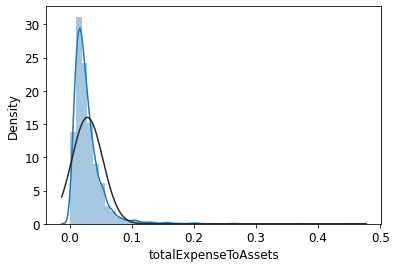

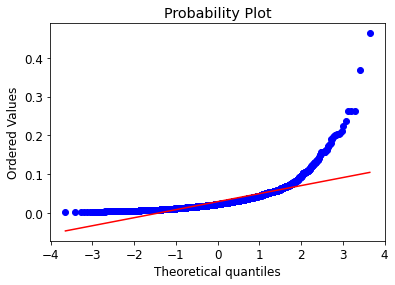

In [202]:
normality_assumption( 'totalExpenseToAssets')


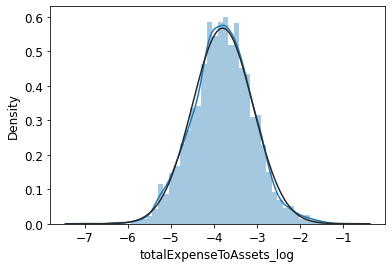

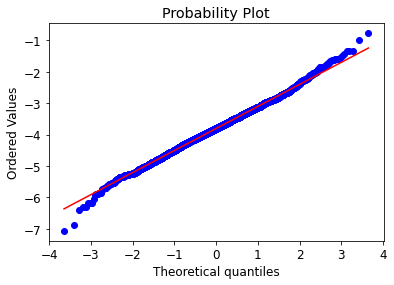

In [203]:
#applying log transformation
raw_data['totalExpenseToAssets_log'] = np.log(raw_data['totalExpenseToAssets'])
normality_assumption( 'totalExpenseToAssets_log')

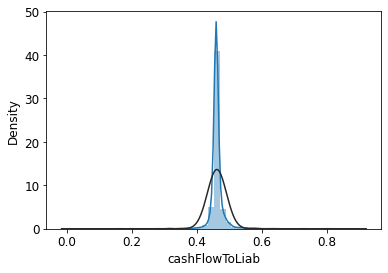

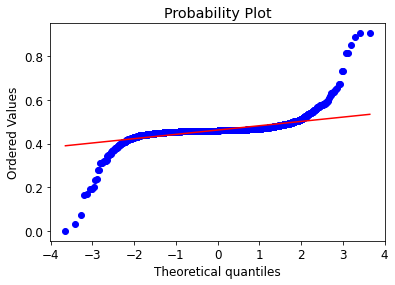

In [204]:
normality_assumption( 'cashFlowToLiab')


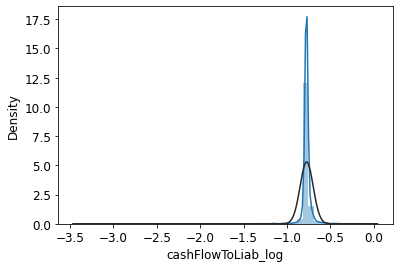

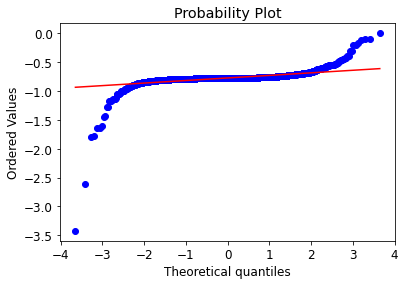

In [205]:
#applying log transformation
raw_data['cashFlowToLiab_log'] = np.log(raw_data['cashFlowToLiab'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'cashFlowToLiab_log')

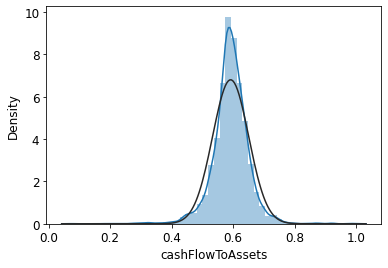

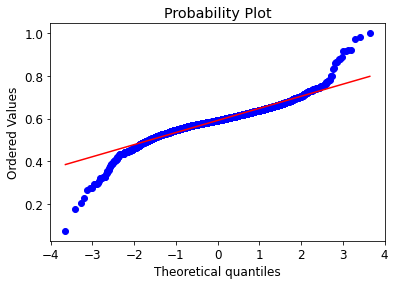

In [206]:
normality_assumption( 'cashFlowToAssets')


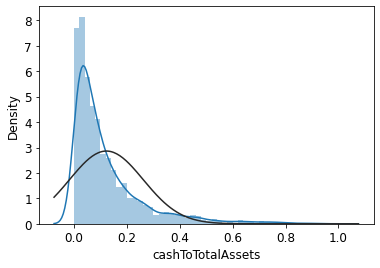

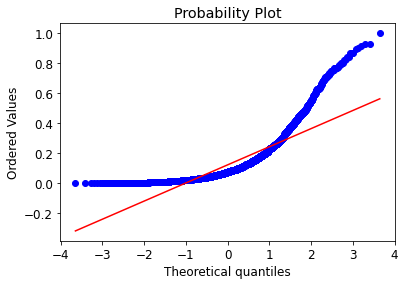

In [207]:
normality_assumption( 'cashToTotalAssets')


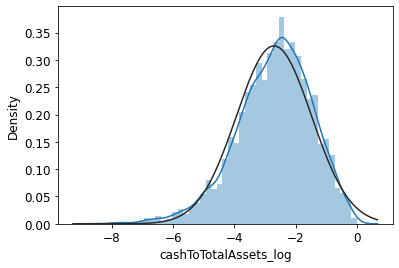

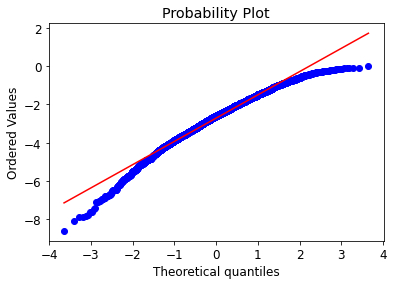

In [208]:
#applying log transformation
raw_data['cashToTotalAssets_log'] = np.log(raw_data['cashToTotalAssets'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'cashToTotalAssets_log')

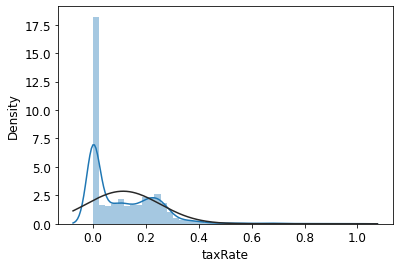

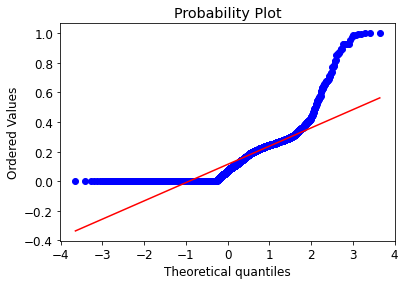

In [209]:
normality_assumption( 'taxRate')


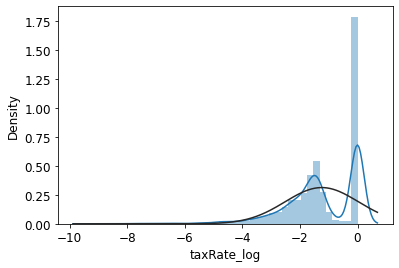

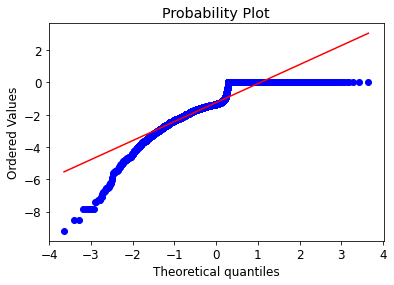

In [210]:
#applying log transformation
raw_data['taxRate_log'] = np.log(raw_data['taxRate'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'taxRate_log')

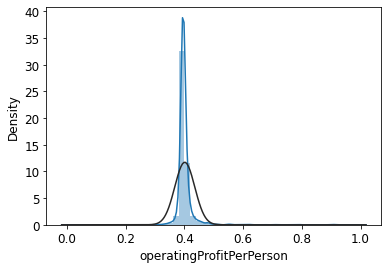

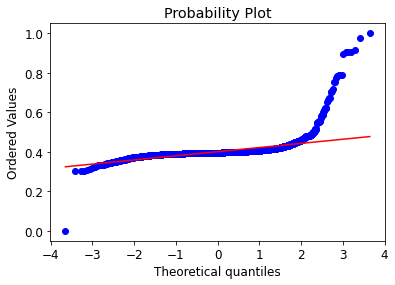

In [211]:
normality_assumption( 'operatingProfitPerPerson')


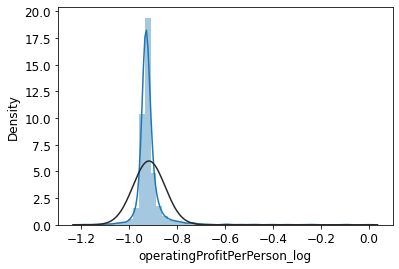

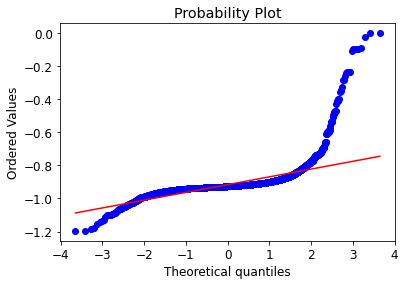

In [212]:
#applying log transformation
raw_data['operatingProfitPerPerson_log'] = np.log(raw_data['operatingProfitPerPerson'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'operatingProfitPerPerson_log')

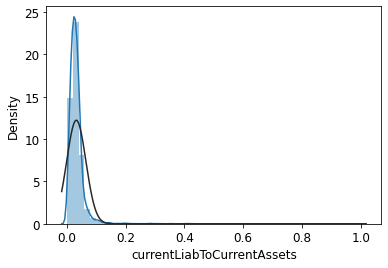

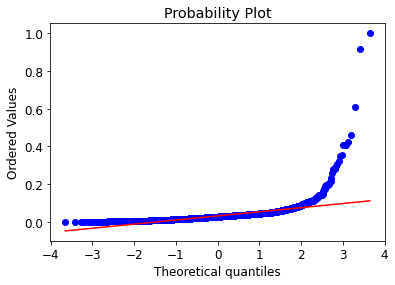

In [213]:
normality_assumption( 'currentLiabToCurrentAssets')


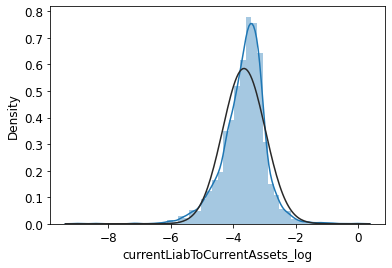

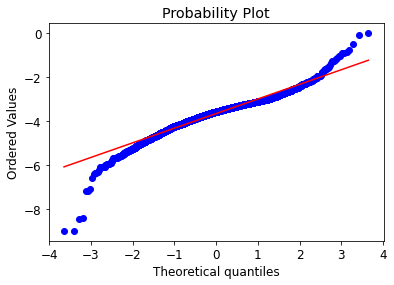

In [214]:
#applying log transformation
raw_data['currentLiabToCurrentAssets_log'] = np.log(raw_data['currentLiabToCurrentAssets'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'currentLiabToCurrentAssets_log')

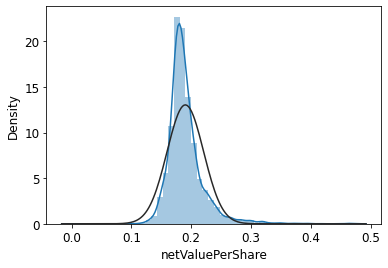

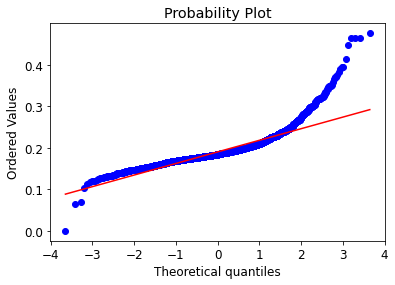

In [215]:
normality_assumption( 'netValuePerShare')


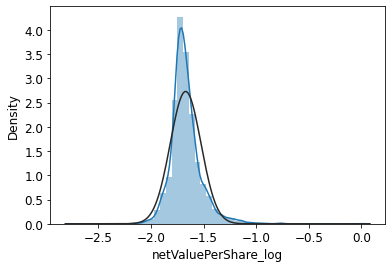

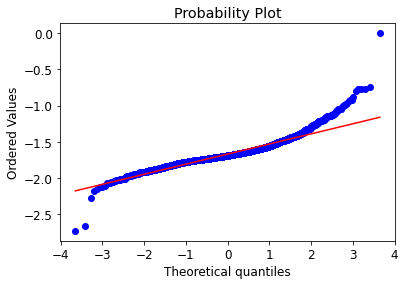

In [216]:
#applying log transformation
raw_data['netValuePerShare_log'] = np.log(raw_data['netValuePerShare'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'netValuePerShare_log')

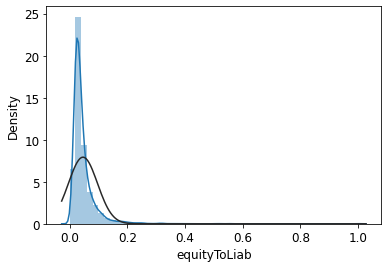

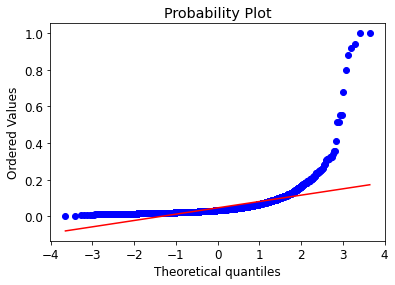

In [217]:
normality_assumption( 'equityToLiab')


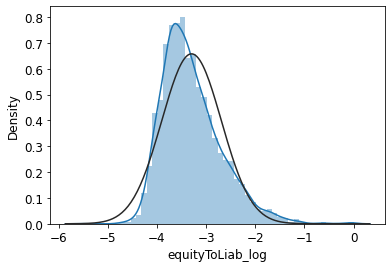

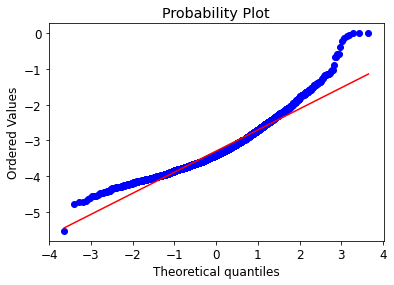

In [218]:
#applying log transformation
raw_data['equityToLiab_log'] = np.log(raw_data['equityToLiab'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'equityToLiab_log')

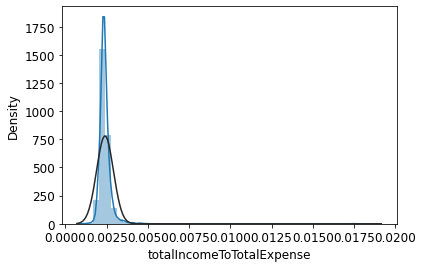

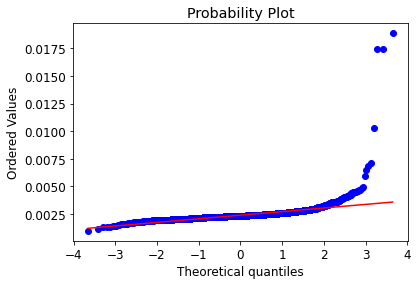

In [219]:
normality_assumption( 'totalIncomeToTotalExpense')


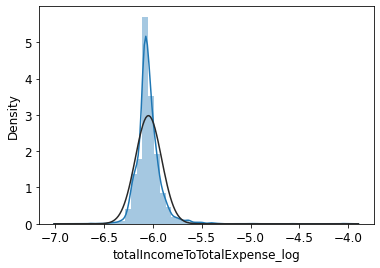

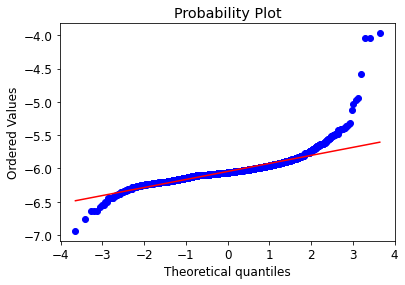

In [220]:
#applying log transformation
raw_data['totalIncomeToTotalExpense_log'] = np.log(raw_data['totalIncomeToTotalExpense'].apply(lambda x:1 if x==0 else x))
normality_assumption( 'totalIncomeToTotalExpense_log')

In [101]:
# Transforming categoriacal variable

In [221]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['liabAssetFlag'])

raw_data = encoder.fit_transform(raw_data)



KeyError: 'liabAssetFlag'

In [103]:
xtrain.columns

Index(['afterTaxInterestRate', 'taxRate', 'netValuePerShare',
       'revenuePerShare', 'currentRatio', 'quickRatio', 'totalDebtToNetWorth',
       'accountsReceivablesTurnover', 'averageCollectionDays',
       'inventoryTurnover', 'fixedAssetsTurnover', 'netWorthTurnover',
       'revenuePerPerson', 'operatingProfitPerPerson',
       'allocationRatePerPerson', 'cashToTotalAssets',
       'quickAssetsToCurrentLiab', 'cashToCurrentLiab', 'operatingFundsToLiab',
       'inventoryToWorkingCap', 'inventoryToCurrentLiab',
       'workingCapitalToEquity', 'longTermLiabToCurrentAssets',
       'totalIncomeToTotalExpense', 'totalExpenseToAssets',
       'currentAssetsTurnover', 'quickAssetTurnover', 'cashTurnover',
       'cashFlowToSales', 'fixedAssetsToTotalAssets', 'currentLiabToTotalLiab',
       'cashFlowToLiab', 'cashFlowToAssets', 'cashFlowToEquity',
       'currentLiabToCurrentAssets', 'liabAssetFlag', 'netIncomeToTotalAssets',
       'noCreditInterval', 'grossProfitToSales', 'liabToEq

# final List

In [104]:
final_vars=['inventoryToWorkingCap',
'inventoryTurnover_bx',
'fixedAssetsTurnover',
'currentAssetsTurnover',
'fixedAssetsToTotalAssets',
'quickAssetTurnover',
'liabAssetFlag_0', 'liabAssetFlag_1',
'inventoryToCurrentLiab',
'revenuePerShare',
'totalExpenseToAssets_log',
'longTermLiabToCurrentAssets',
'allocationRatePerPerson',
'cashFlowToLiab_log',
'degreeFinLeverage',
'cashFlowToAssets',
'cashToCurrentLiab',
'cashToTotalAssets_log',
'taxRate',
'operatingProfitPerPerson_log',
'quickAssetsToCurrentLiab',
'currentLiabToCurrentAssets_log',
'currentRatio',
'netValuePerShare_log',
'quickRatio',
'equityToLiab_log',
'totalIncomeToTotalExpense_log',
'totalDebtToNetWorth',]

In [105]:
data = raw_data[final_vars]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns!='default'], raw_data['default'], 
                                                  stratify= raw_data['default'], 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [116]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 198
Before OverSampling, counts of label '0': 4500 

After OverSampling, the shape of train_X: (9000, 28)
After OverSampling, the shape of train_y: (9000,) 

After OverSampling, counts of label '1': 4500
After OverSampling, counts of label '0': 4500


# Modelling 1: Logistic Regression

In [131]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [132]:
y_pred_test = logreg.predict(X_test)


In [133]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7433


In [134]:
y_pred_train = logreg.predict(X_train)



In [136]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7241


In [137]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7241
Test set score: 0.7433


In [139]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[381 119]
 [ 15   7]]

True Positives(TP) =  381

True Negatives(TN) =  7

False Positives(FP) =  119

False Negatives(FN) =  15


<AxesSubplot:>

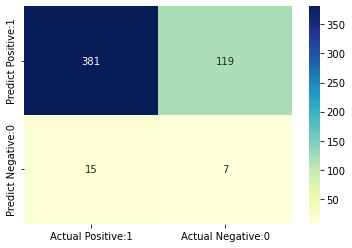

In [140]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [141]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       500
           1       0.06      0.32      0.09        22

    accuracy                           0.74       522
   macro avg       0.51      0.54      0.47       522
weighted avg       0.92      0.74      0.82       522



In [143]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [144]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7433


In [145]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2567


In [146]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7620


In [147]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9621


In [148]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9621


In [149]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.9444


In [150]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.0556


In [154]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[  0 500]
 [  0  22]] 

 with 22 correct predictions,  

 500 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0421455938697318 

 Sensitivity:  1.0 

 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  

 [[  0 500]
 [  0  22]] 

 with 22 correct predictions,  

 500 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0421455938697318 

 Sensitivity:  1.0 

 Specificity:  0.0 



With 0.3 threshold the Confusion Matrix is  

 [[  0 500]
 [  0  22]] 

 with 22 correct predictions,  

 500 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0421455938697318 

 Sensitivity:  1.0 

 Specificity:  0.0 



With 0.4 threshold the Confusion Matrix is  

 [[  0 500]
 [  0  22]] 

 with 22 correct predictions,  

 500 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accura

In [155]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5272


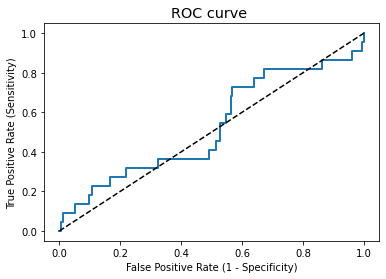

In [156]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve ')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Tested the model with and without oversampling and it didn't give good results. will go with ensemle models

# Modelling 2: Ensemle models 

In [158]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [159]:
kfold = StratifiedKFold(n_splits=10)

In [160]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

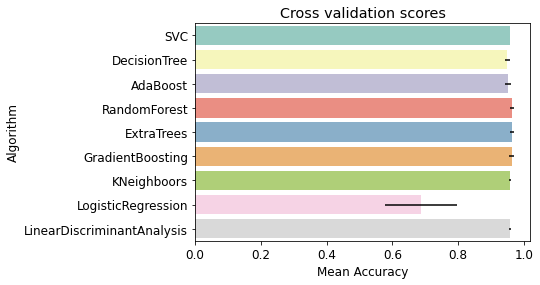

In [161]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=8))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

I decided to choose the SVC, AdaBoost, RandomForest , ExtraTrees and the GradientBoosting classifiers for the ensemble modeling.

In [162]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsadaDTC.fit(X_train,ytrain)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


C:\Users\Ashwani\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [306]:
gsadaDTC.best_score_

0.955940661434469

In [163]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3],
              "min_samples_split": [2, 3],
              "min_samples_leaf": [1, 3],
              "bootstrap": [False],
              "n_estimators" :[100,120],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsExtC.fit(X_train,ytrain)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\Ashwani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9627487184140089

In [164]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3],
              "min_samples_leaf": [1, 3],
              "bootstrap": [False],
              "n_estimators" :[100,120],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8,verbose = 1)

gsRFC.fit(X_train,ytrain)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\Ashwani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9633870162863495

In [165]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200],
              'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsGBC.fit(X_train,ytrain)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


C:\Users\Ashwani\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9650927732159869

In [166]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [  0.01, 0.1],
                  'C': [1, 10, 50]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsSVMC.fit(X_train,ytrain)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\Ashwani\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9576418817765278

# Plot learning curves


Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

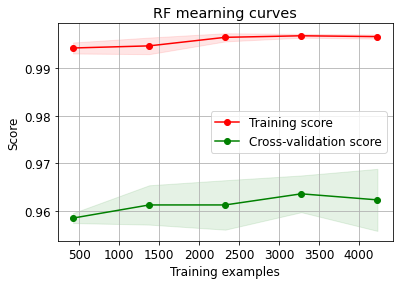

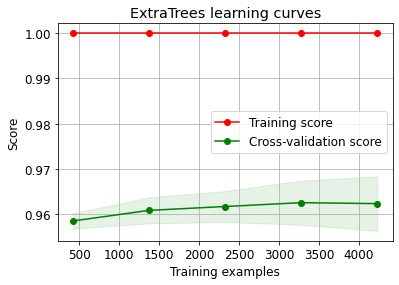

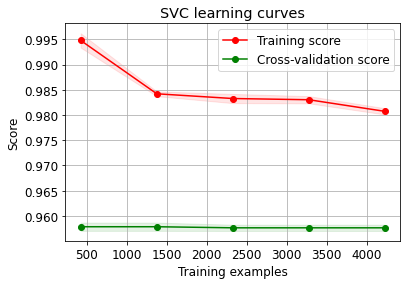

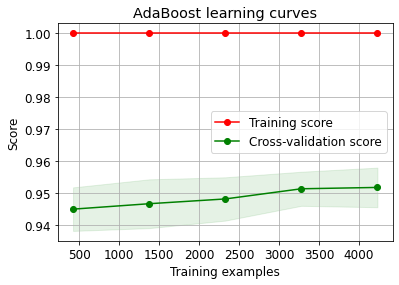

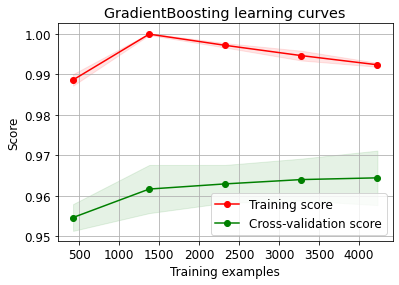

In [167]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,ytrain,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,ytrain,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,ytrain,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,ytrain,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,ytrain,cv=kfold)

# Feature importance of tree based classifiers

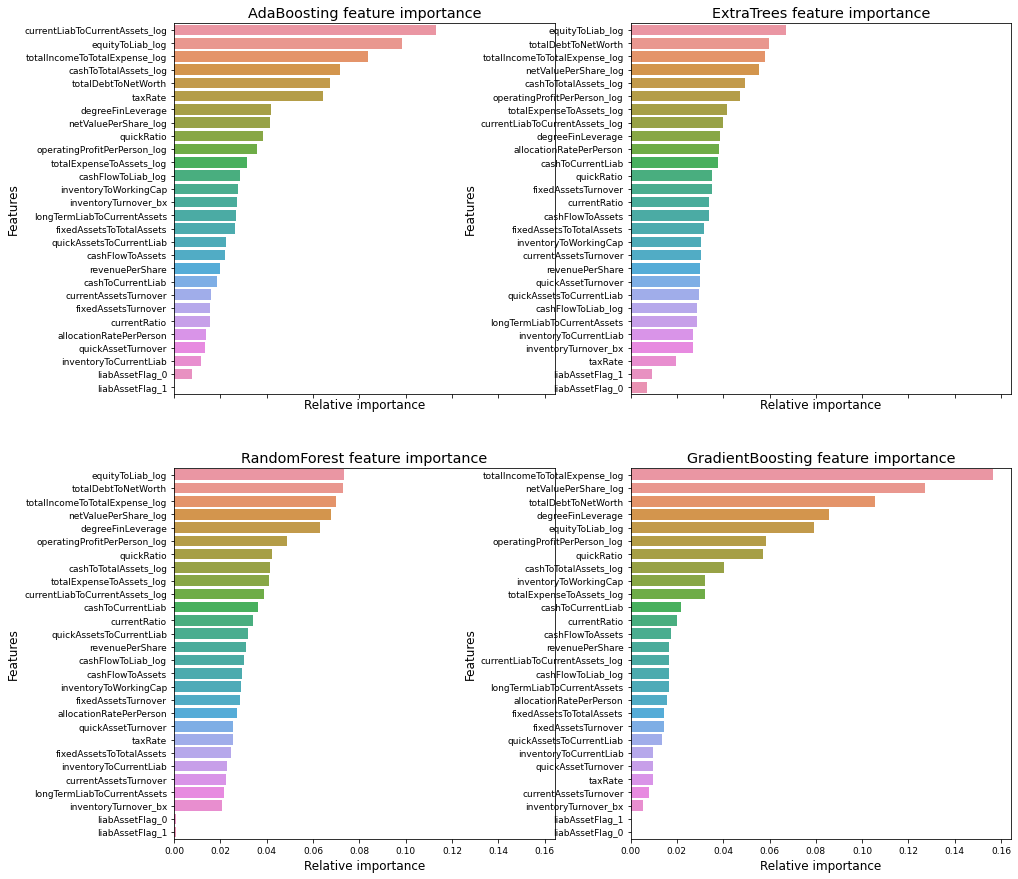

In [377]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

# Feature directions using SHAP values

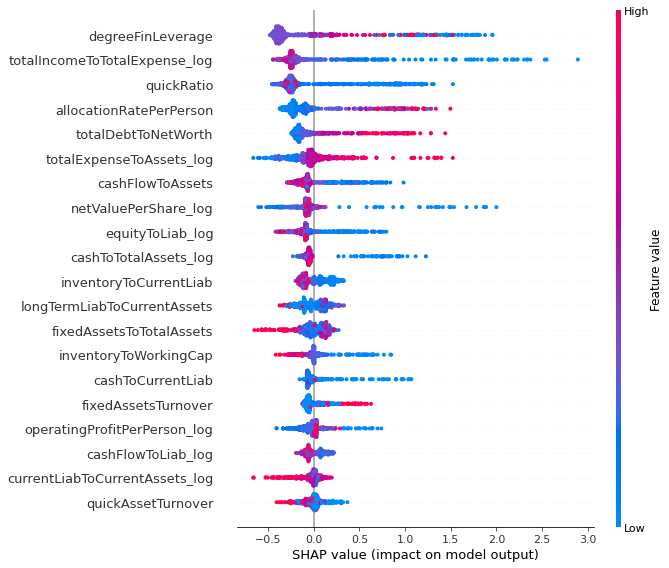

In [170]:
import shap
explainer = shap.TreeExplainer(GBC_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

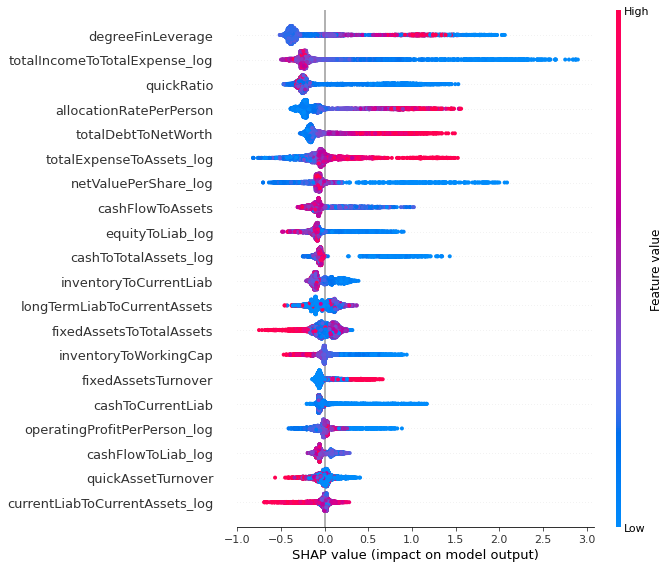

In [171]:
import shap
explainer = shap.TreeExplainer(GBC_best)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

# Prediction

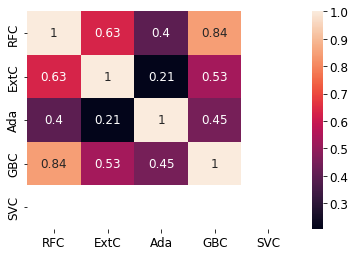

In [378]:
xvalid_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
xvalid_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
xvalid_SVMC = pd.Series(SVMC_best.predict(X_test), name="SVC")
xvalid_AdaC = pd.Series(ada_best.predict(X_test), name="Ada")
xvalid_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([xvalid_RFC,xvalid_ExtC,xvalid_AdaC,xvalid_GBC, xvalid_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [313]:
# Voting Classifier

In [223]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=8)

votingC = votingC.fit(X_train, ytrain)

In [224]:
ytest_pred_ens = pd.Series(votingC.predict(X_test))



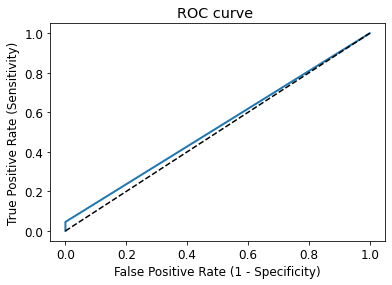

In [225]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_ens)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve ')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [226]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, ytest_pred_ens)

print('Confusion matrix\n\n', cm1)

print('\nTrue Negative(TN) = ', cm1[0,0])

print('\nTrue Positive(TP) = ', cm1[1,1])

print('\nFalse Negative(FN) = ', cm1[0,1])

print('\nFalse Positive(FP) = ', cm1[1,0])

Confusion matrix

 [[500   0]
 [ 21   1]]

True Negative(TN) =  500

True Positive(TP) =  1

False Negative(FN) =  0

False Positive(FP) =  21


<AxesSubplot:>

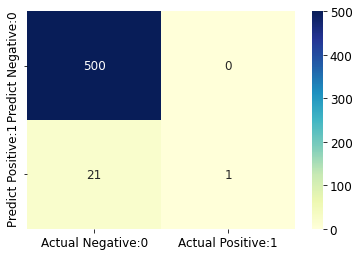

In [228]:
# visualize confusion matrix with seaborn heatmap

cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='YlGnBu')

# Because of lack of time and computation resources, I couldn't tune my ensemble models, but accuracy could've improved greatly